# Events impact on scores

# Setup

In [347]:
import os
import platform
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
if platform.system() not in (('Darwin'), ('Linux')):
from pickle5 import pickle

In [376]:
# Import data
DATA_PATH = "data"
PKL_PATH = 'data/pkl'

if platform.system() in (('Darwin'), ('Linux')):
    # For Mac users :
    df = pd.read_pickle(os.path.join(PKL_PATH, "final_subset_flaired.pkl"))
else:
    ### For windows users :
    df = pickle.load(open("data/pkl/final_subset_flaired.pkl", "rb"))

events = pd.read_csv("data/events/events_weights.csv").iloc[:,1:5]

In [377]:
# Transform data type for further use
df['date'] = pd.DatetimeIndex(df['date'])#.normalize()
events['date'] = pd.DatetimeIndex(events['date'])#.normalize()

In [378]:
# Create subdata for each party
party_grps = df.groupby('parties')
df_rep = df[df["parties"] == "Republican"]
df_dem = df[df["parties"] == "Democrat"]

# Sentiment score distribution around key events

### 2 weeks prior and after event

C:\Users\rened\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


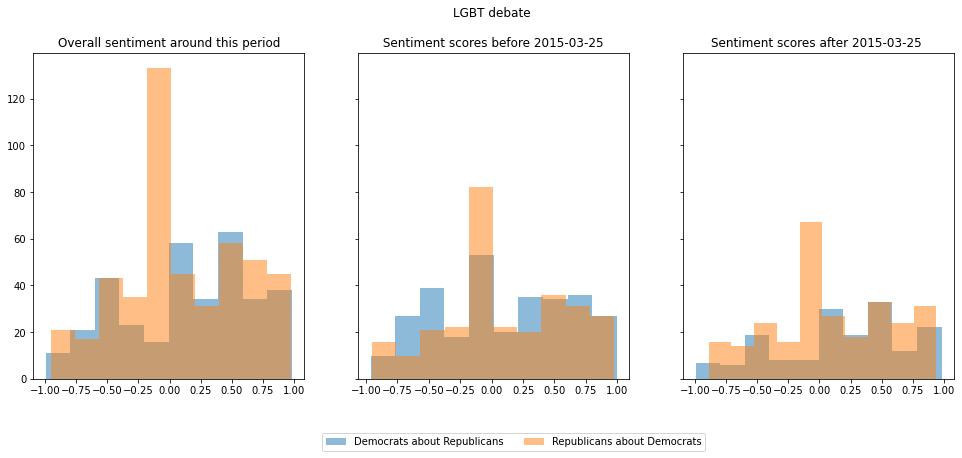

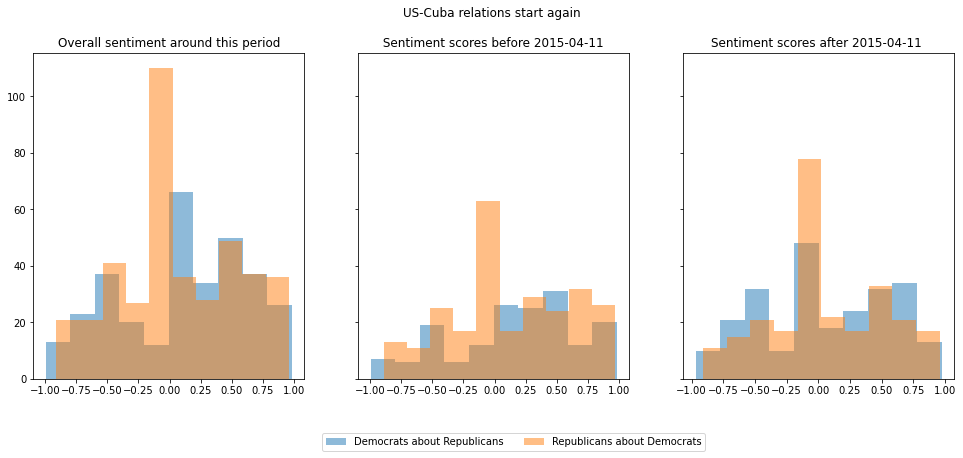

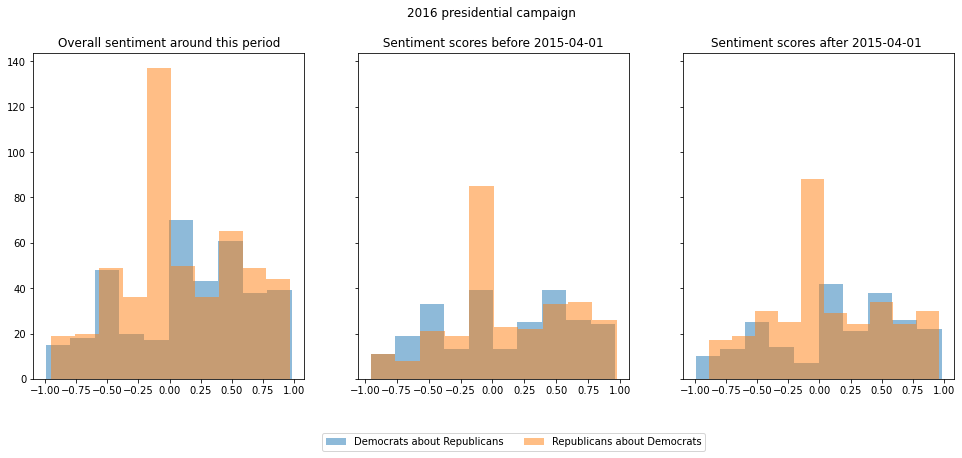

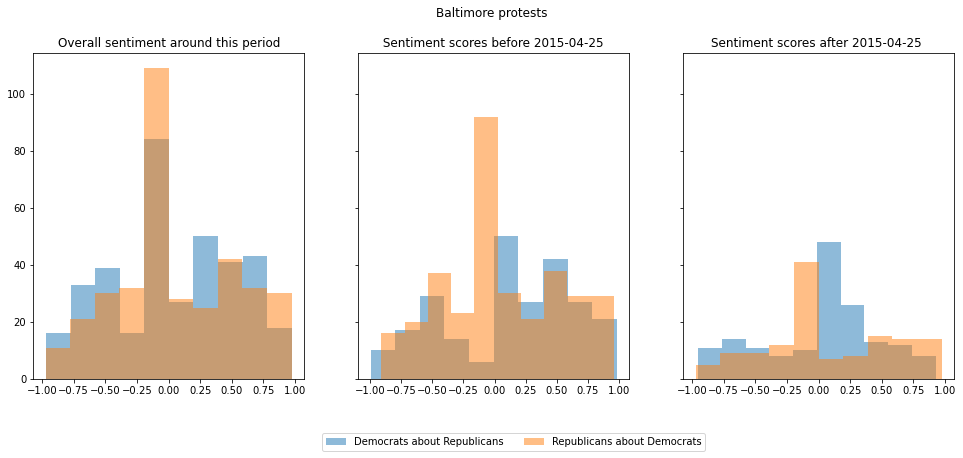

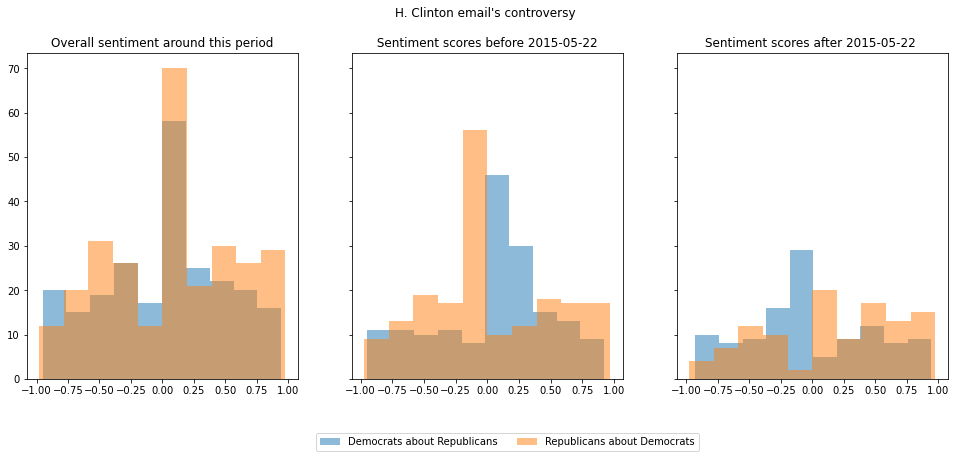

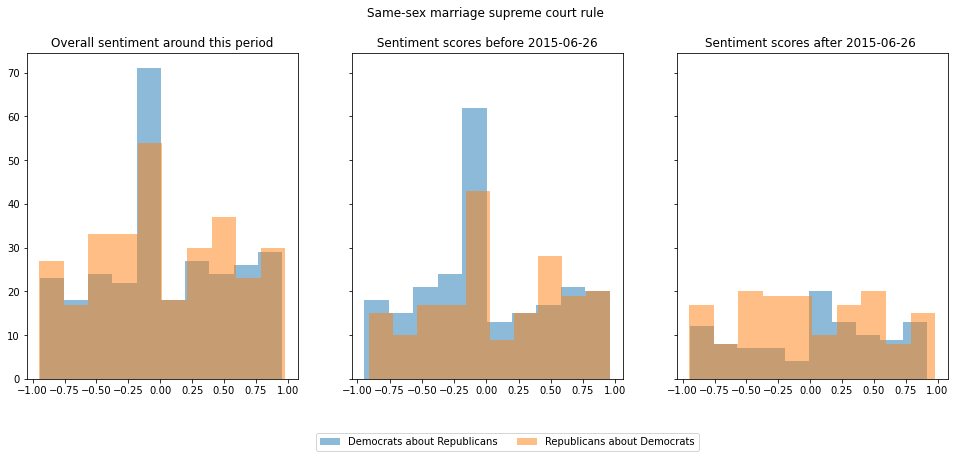

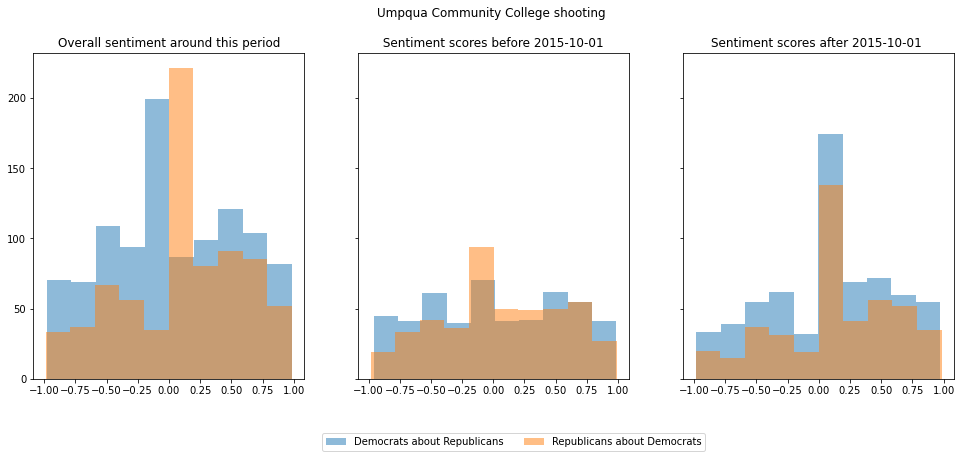

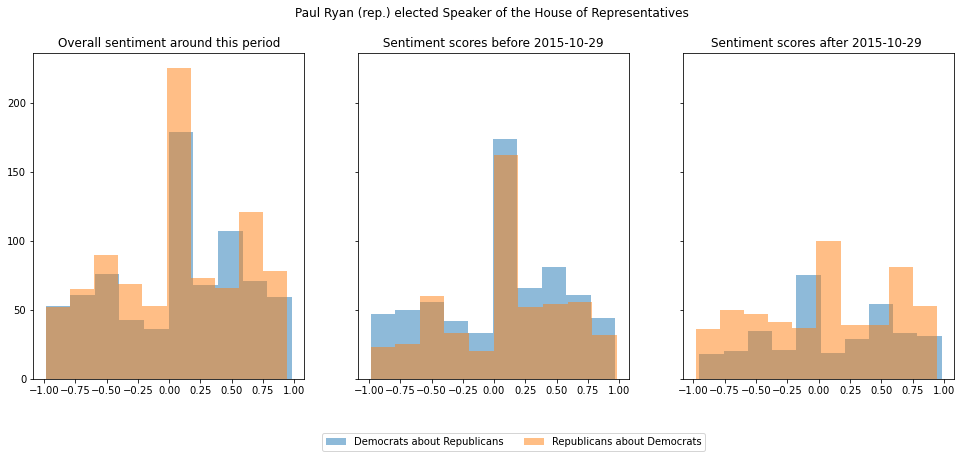

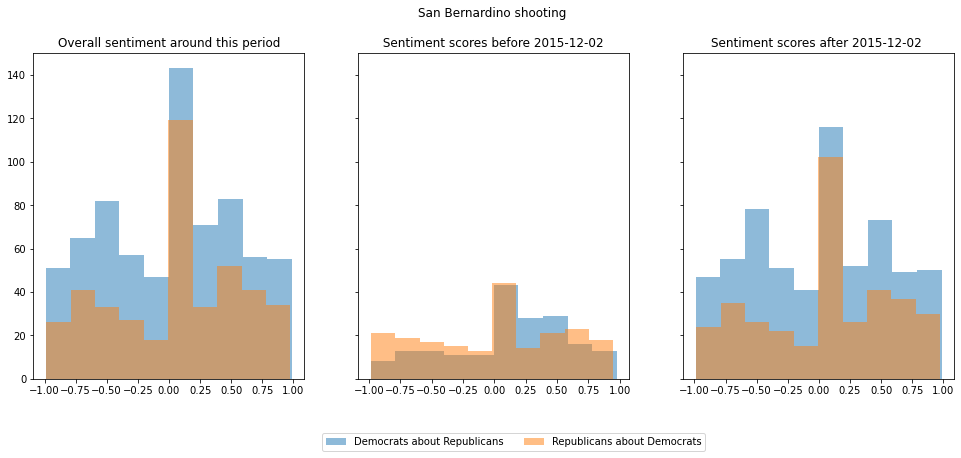

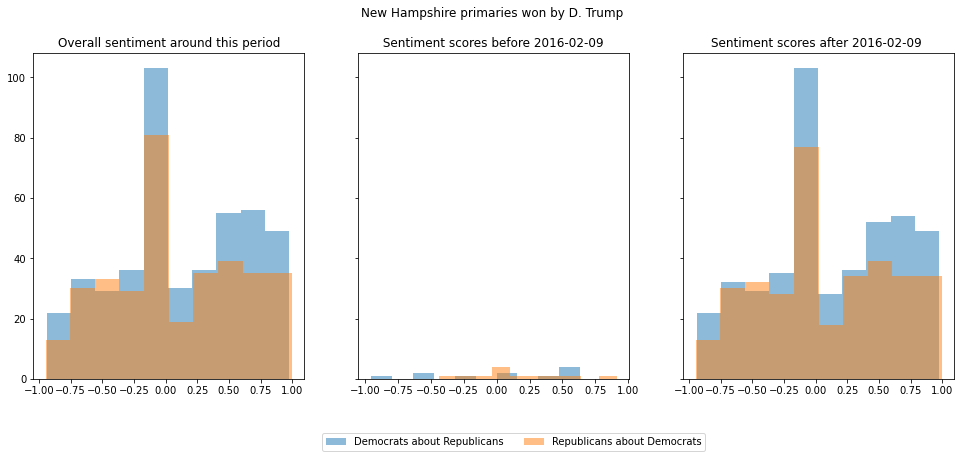

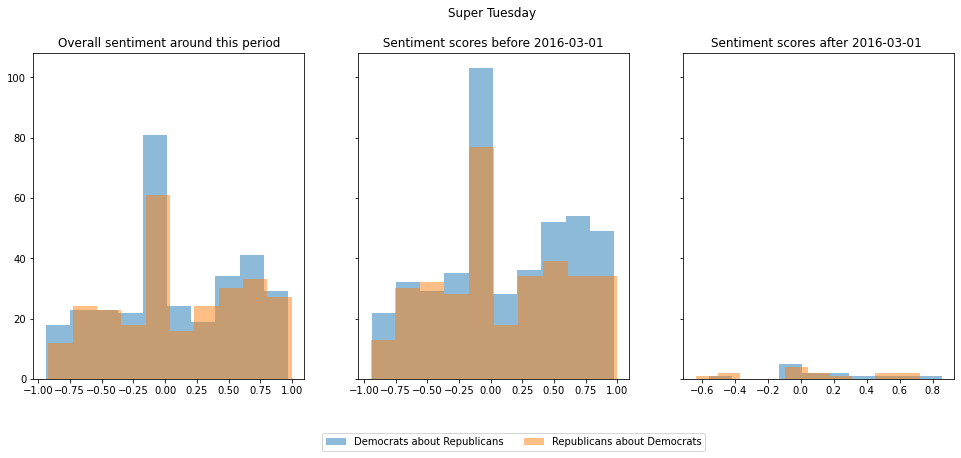

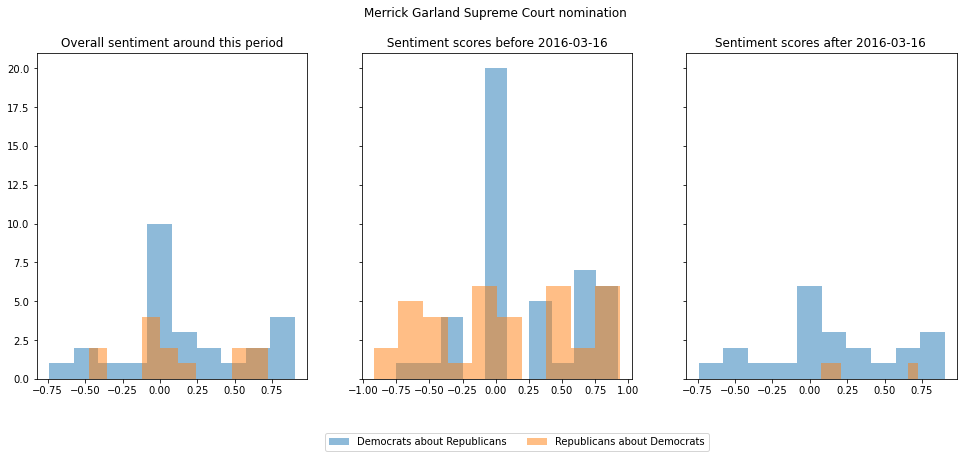

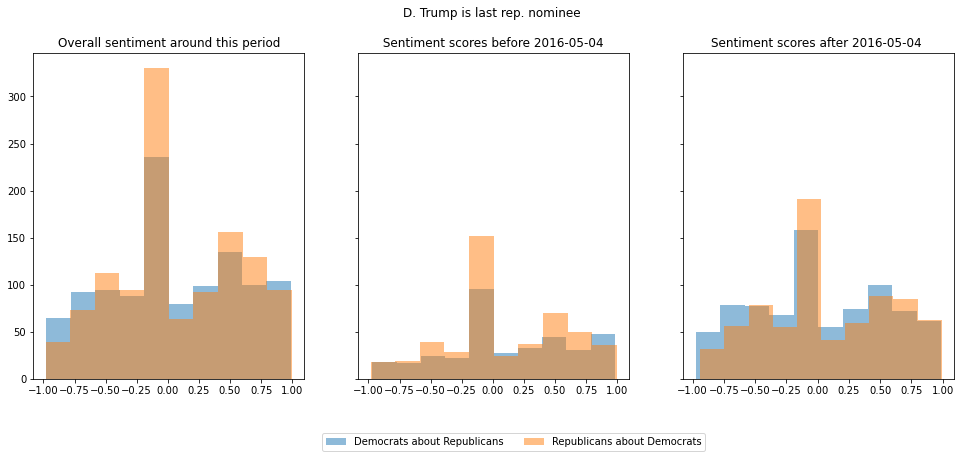

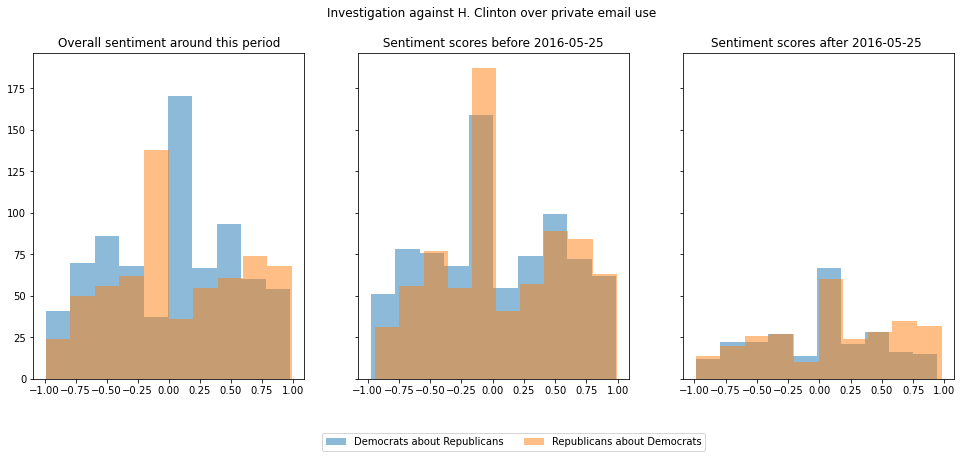

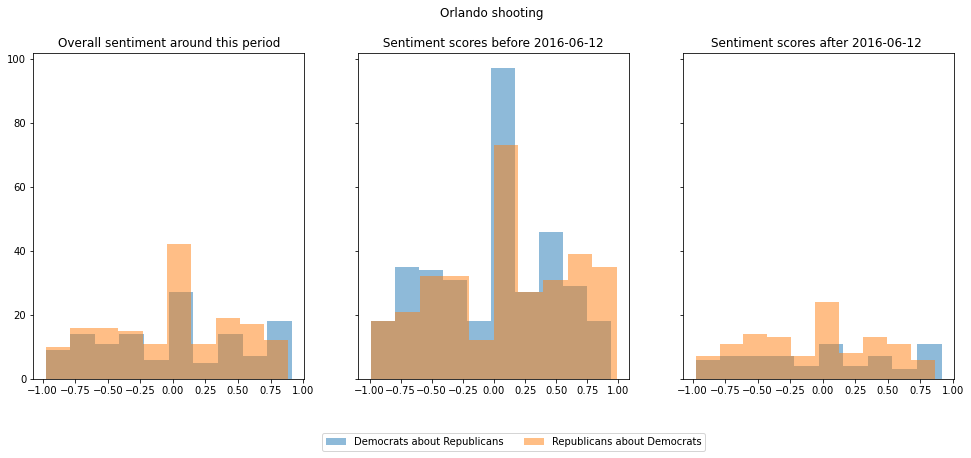

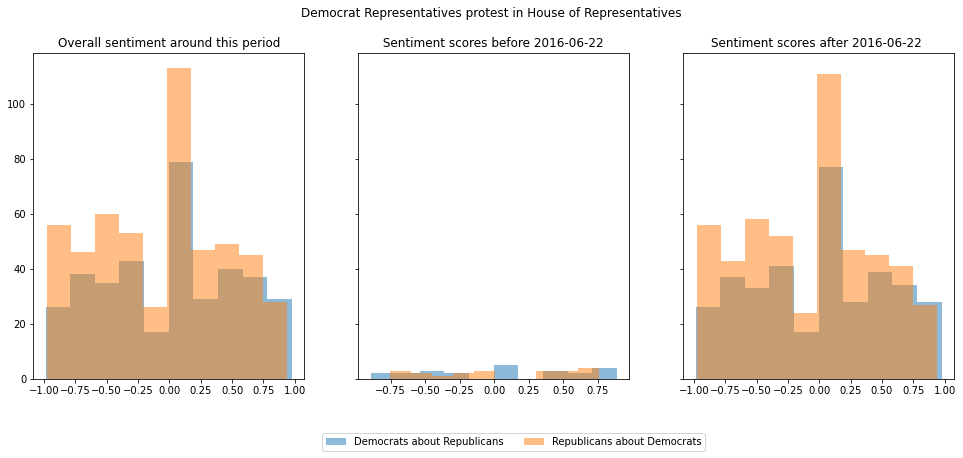

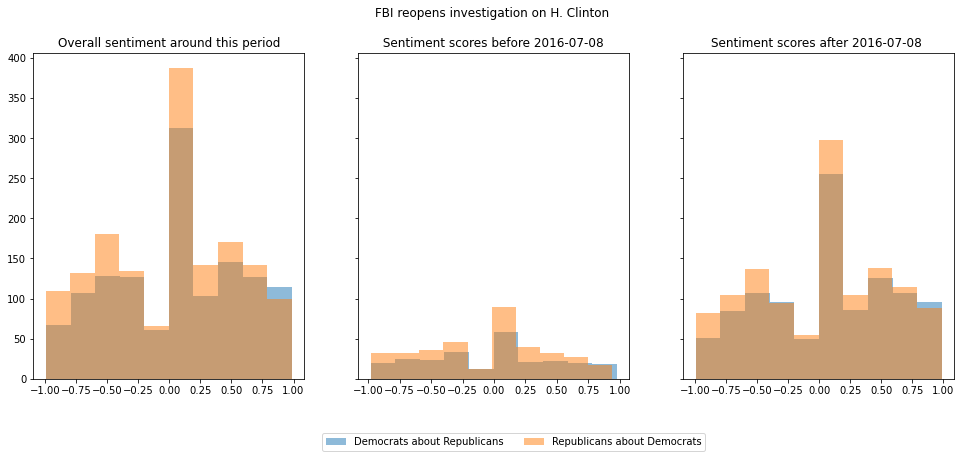

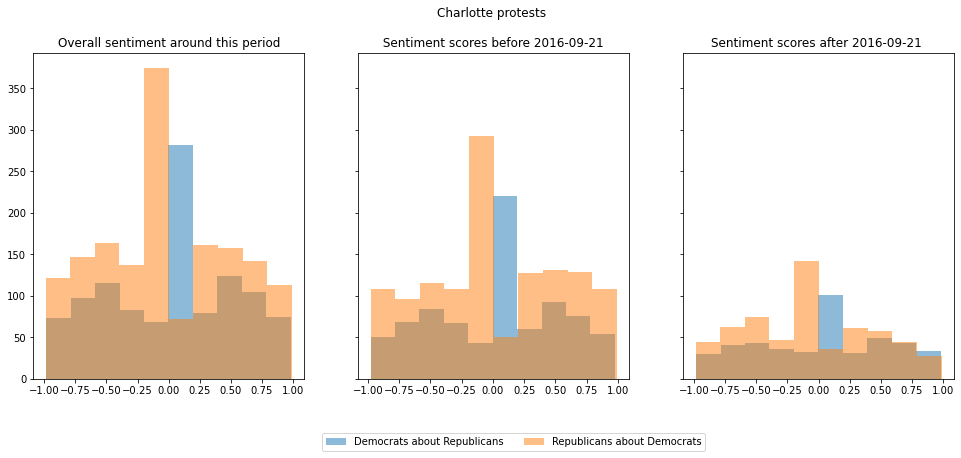

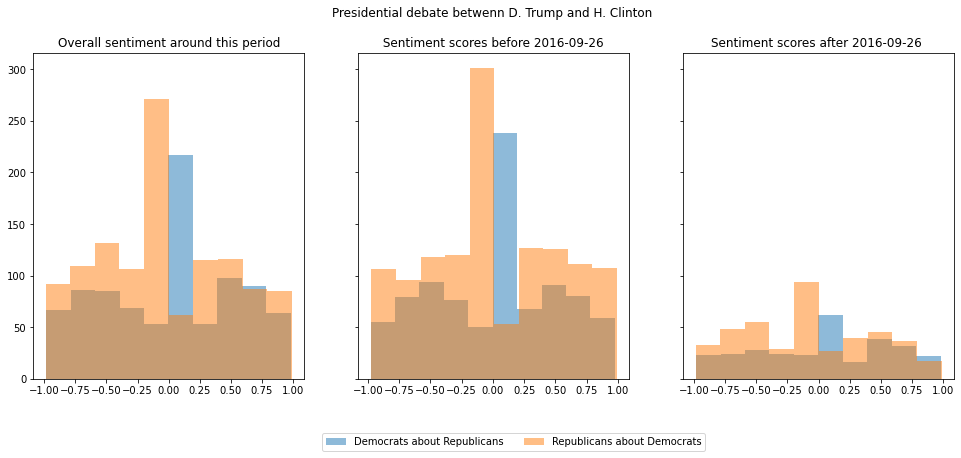

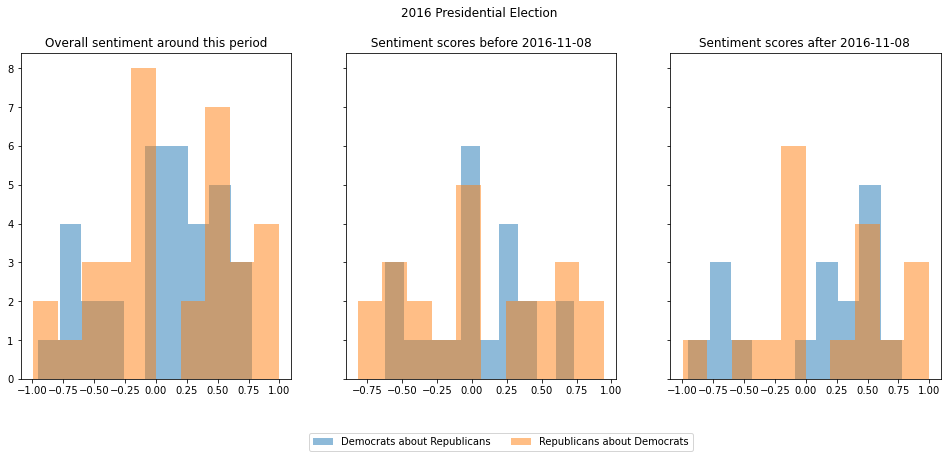

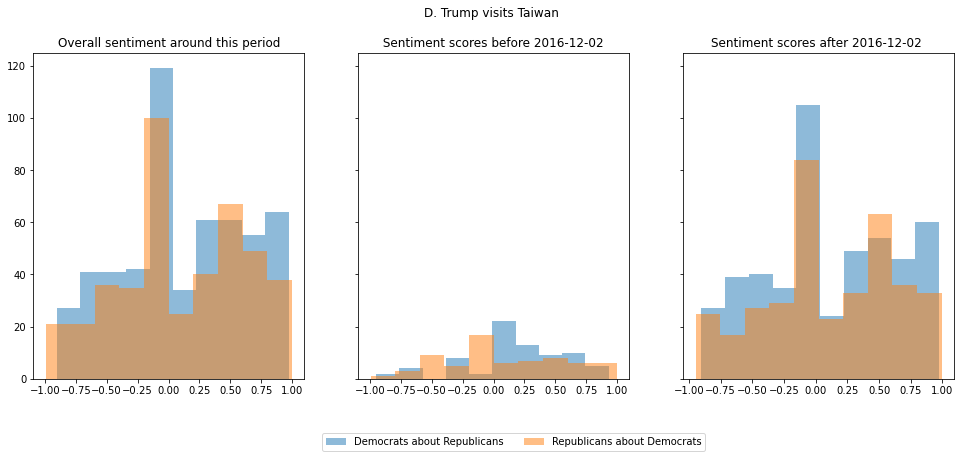

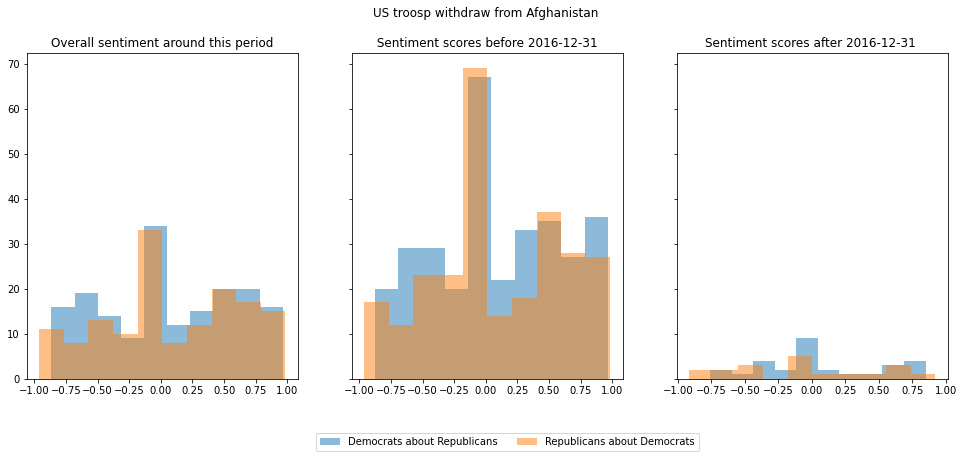

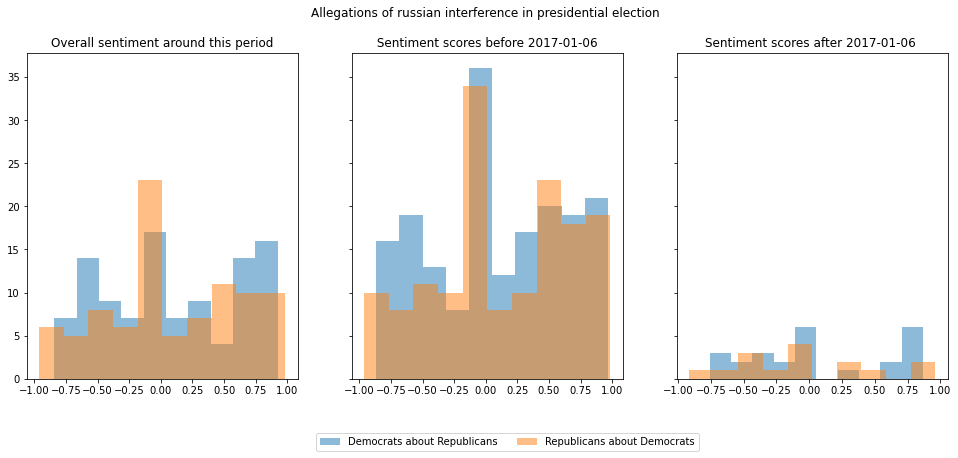

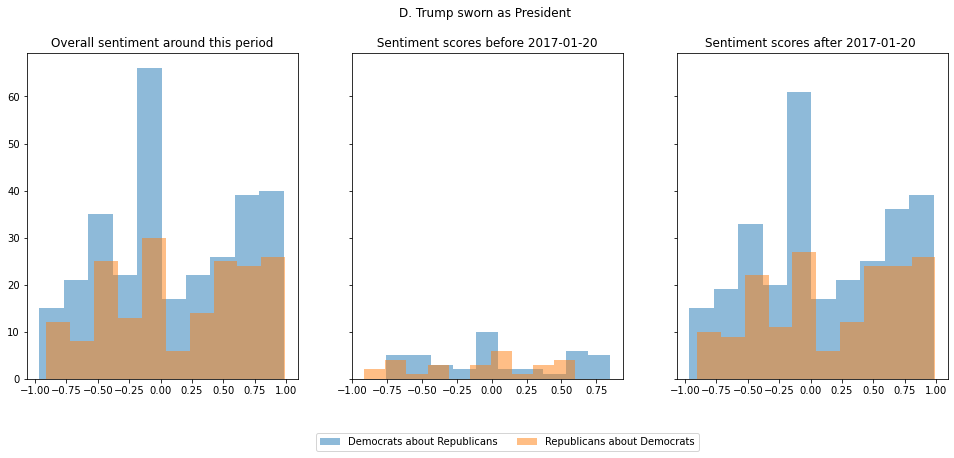

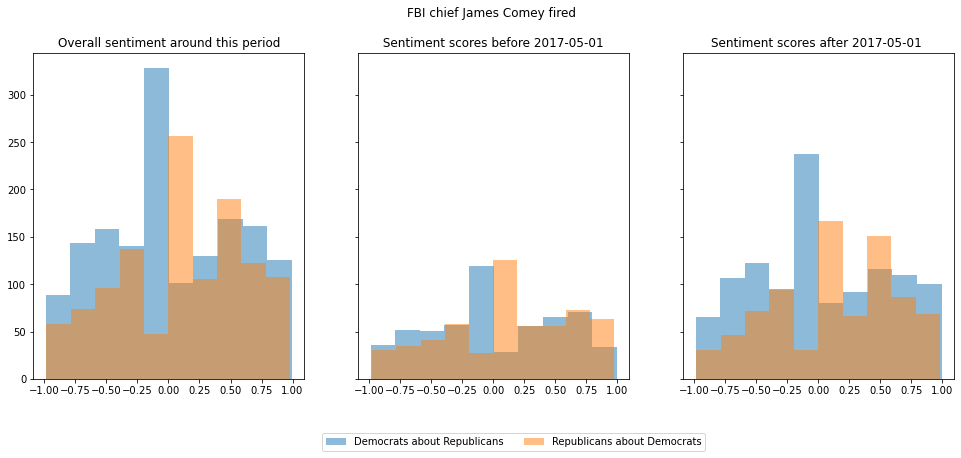

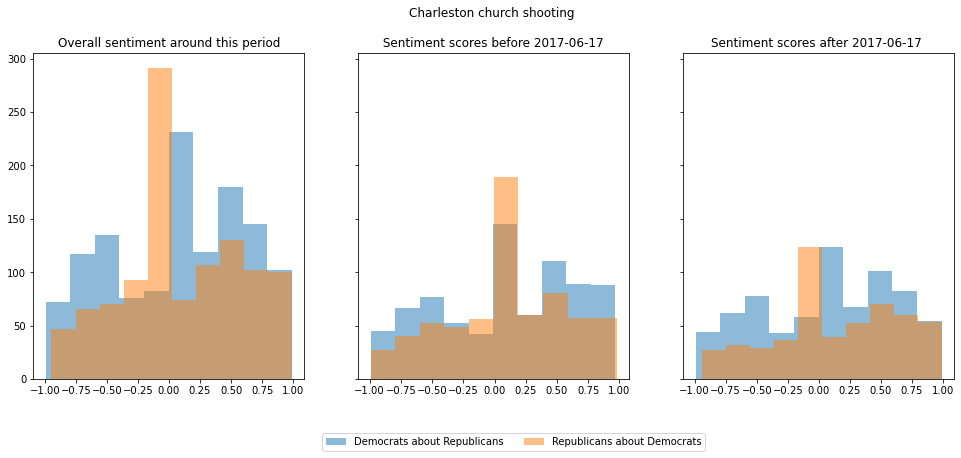

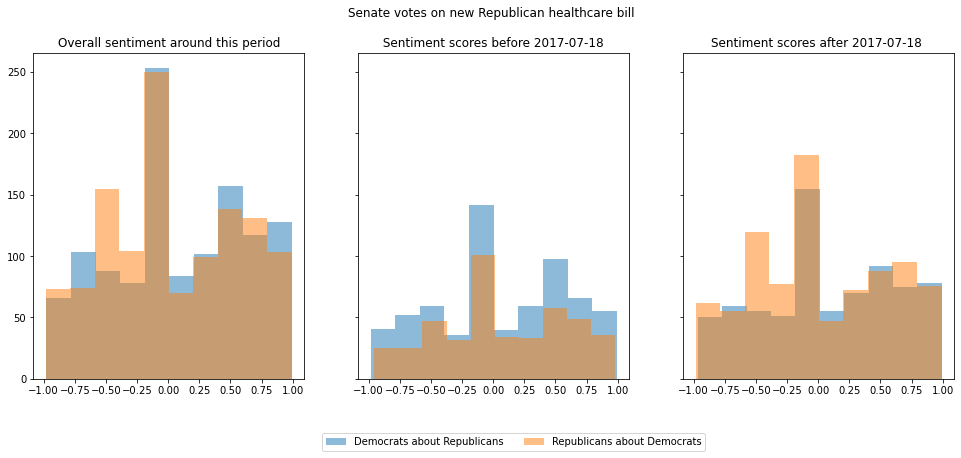

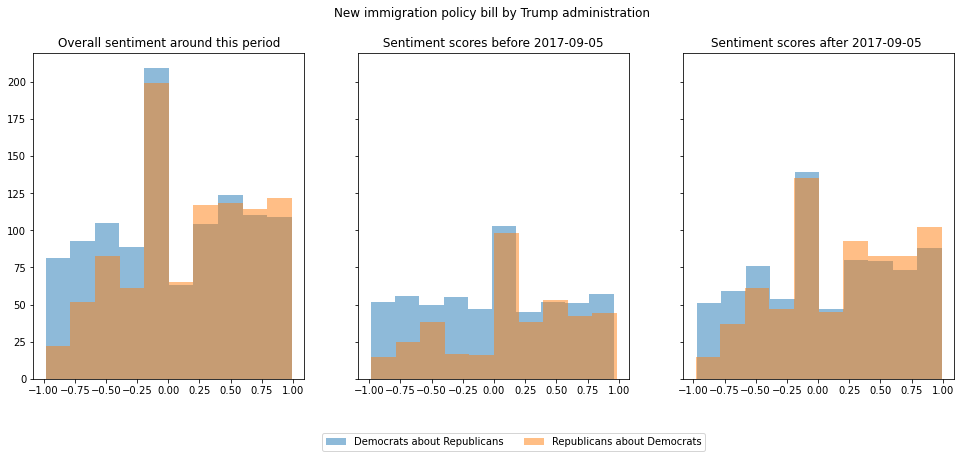

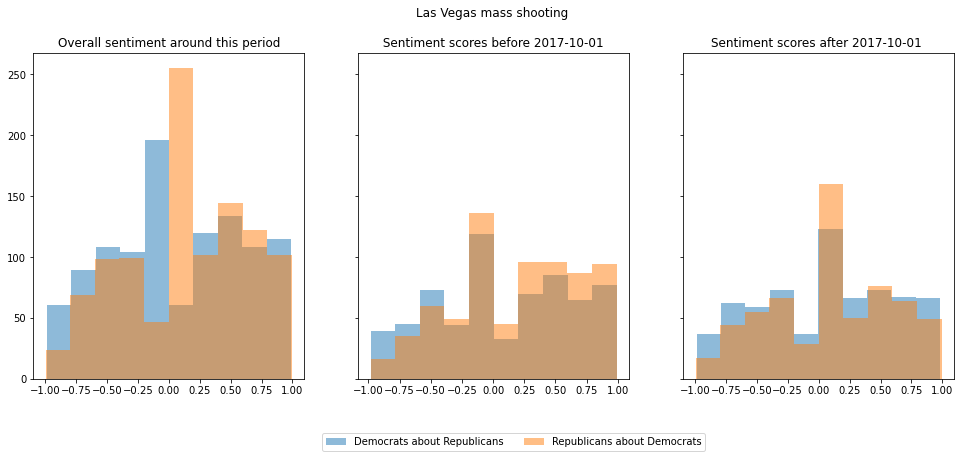

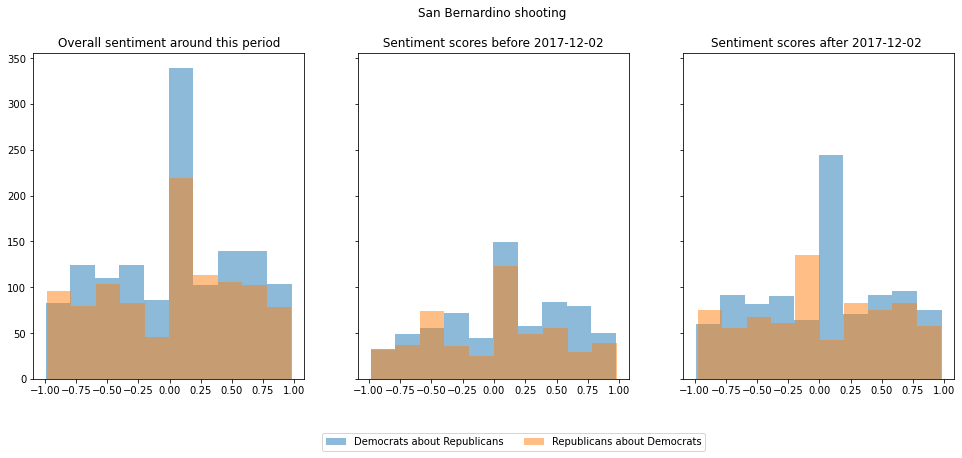

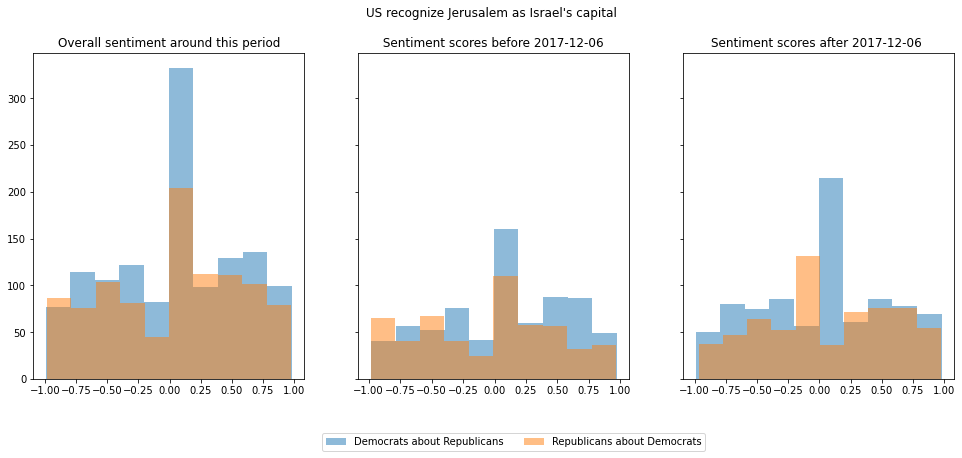

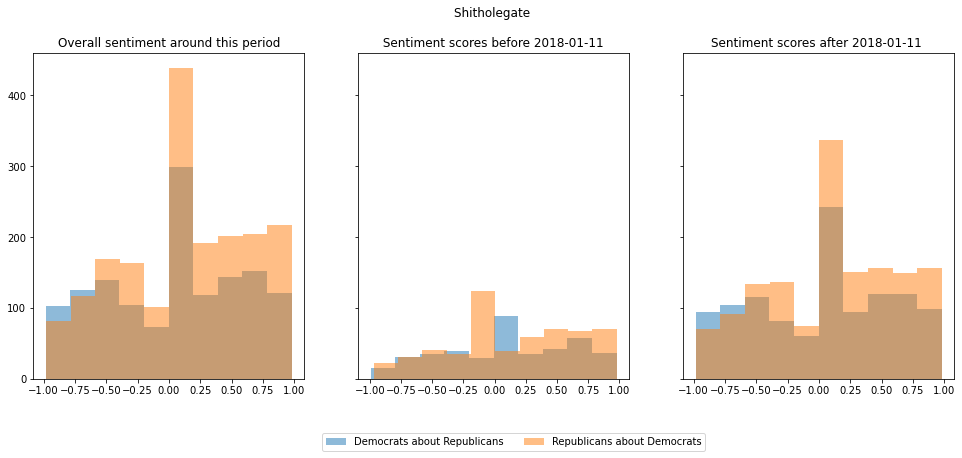

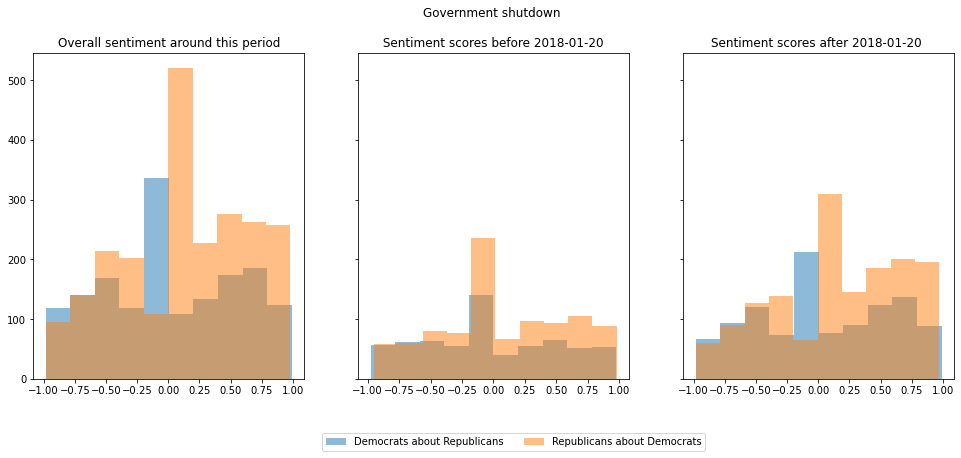

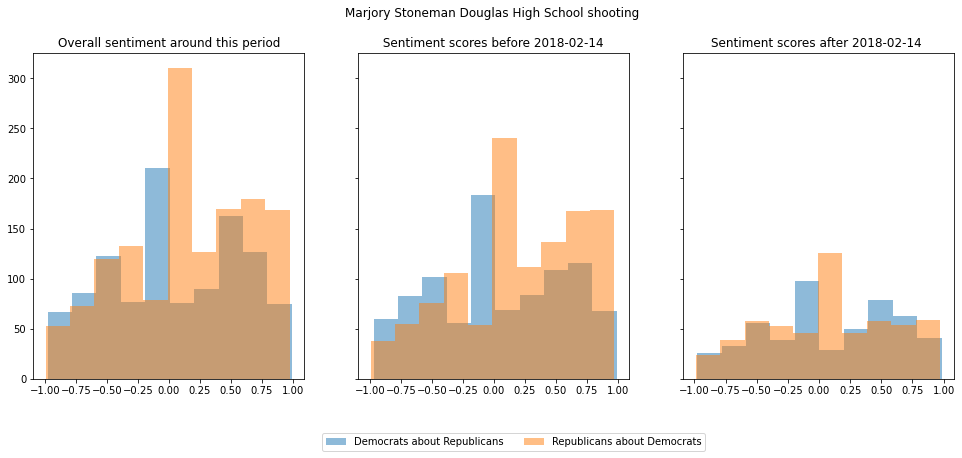

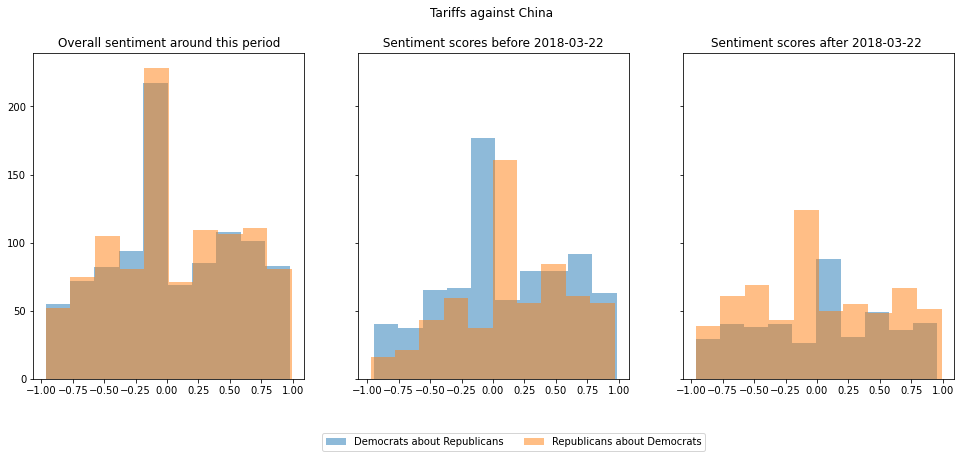

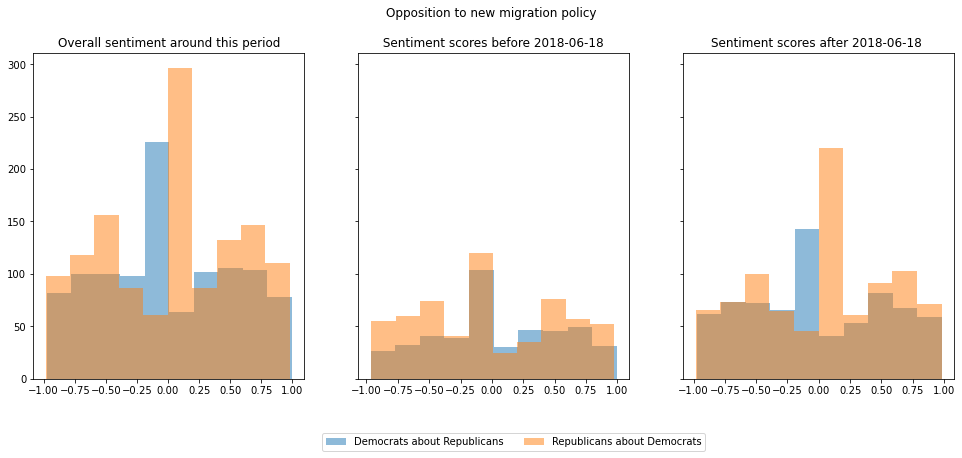

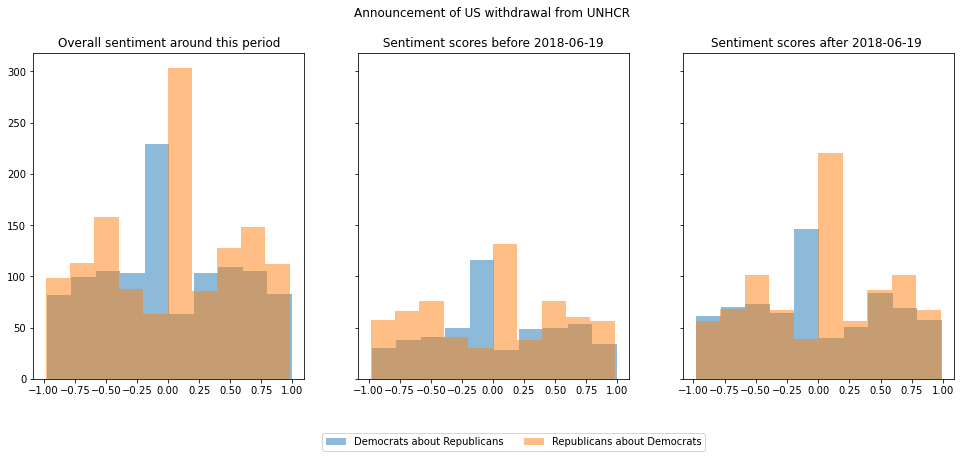

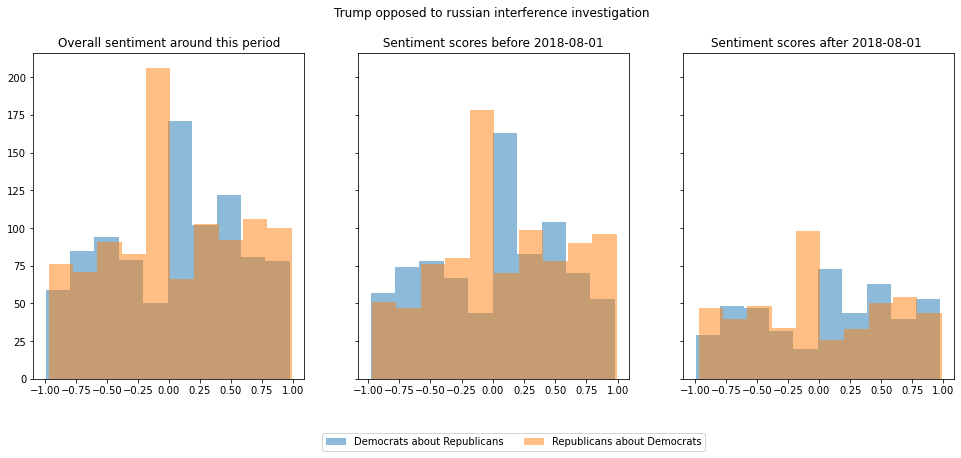

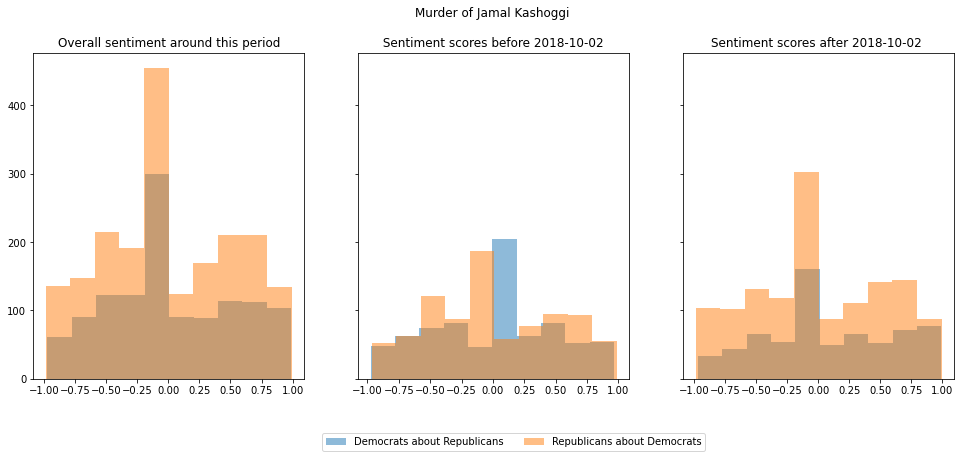

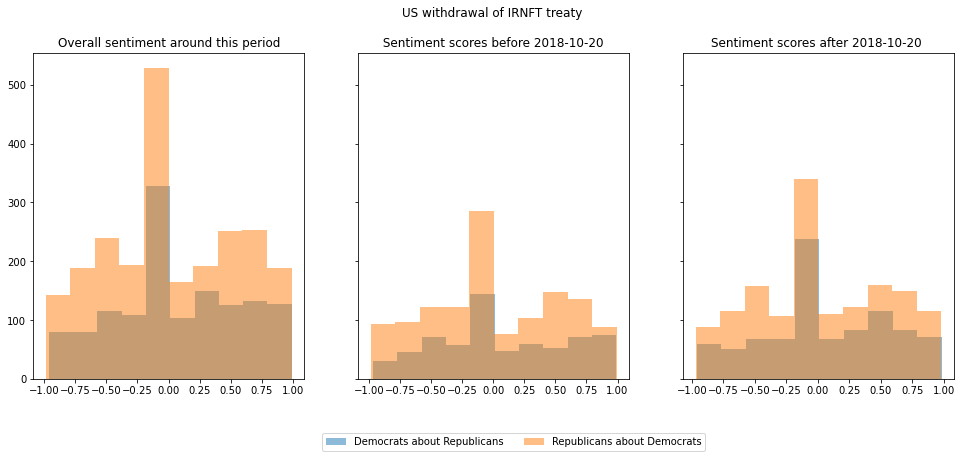

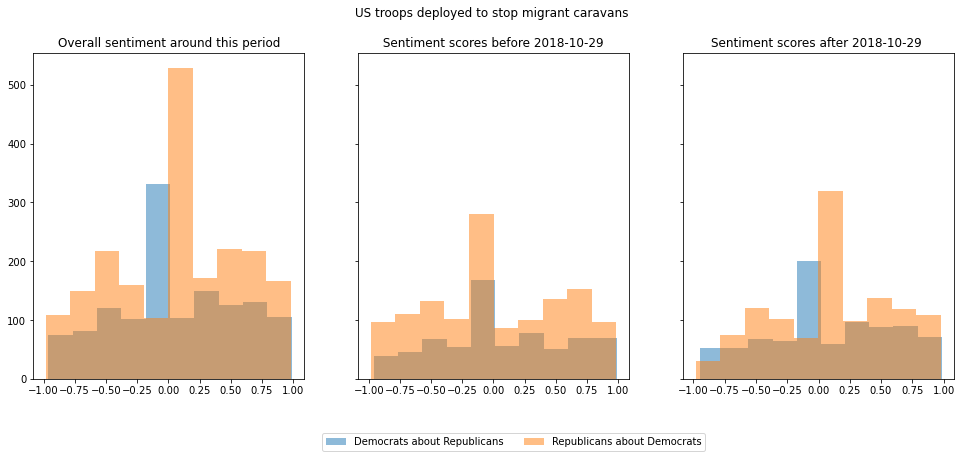

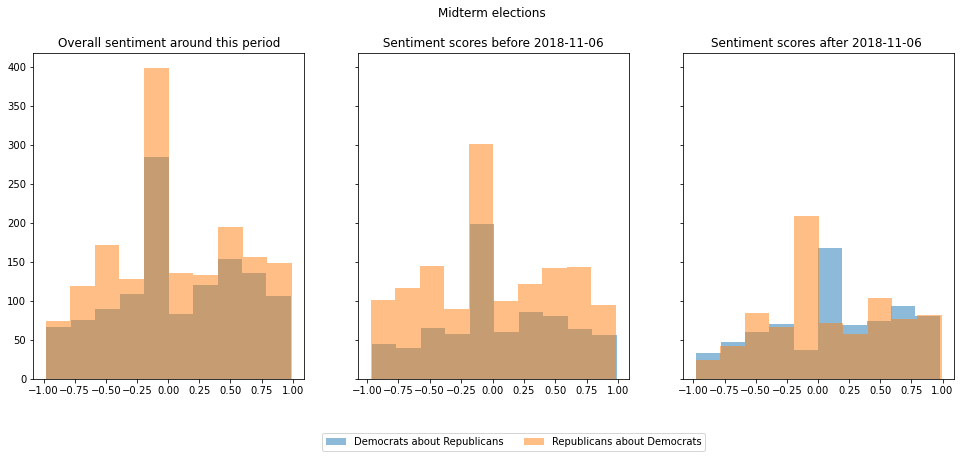

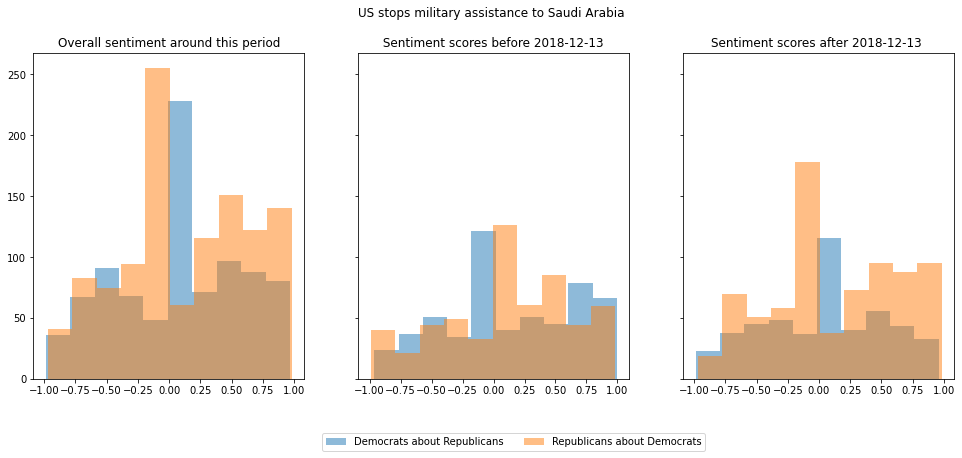

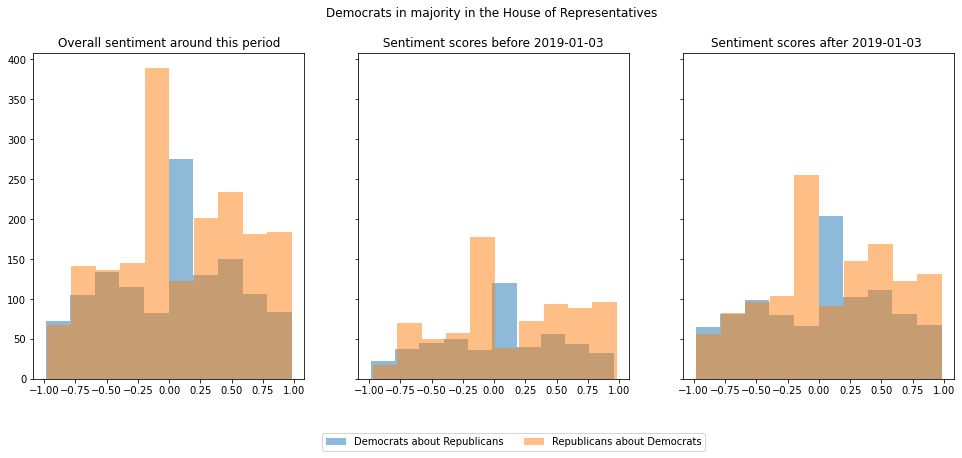

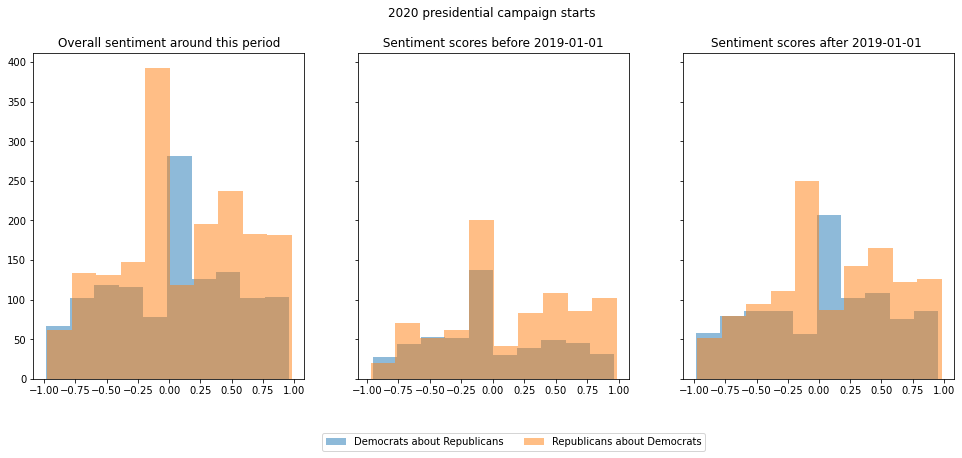

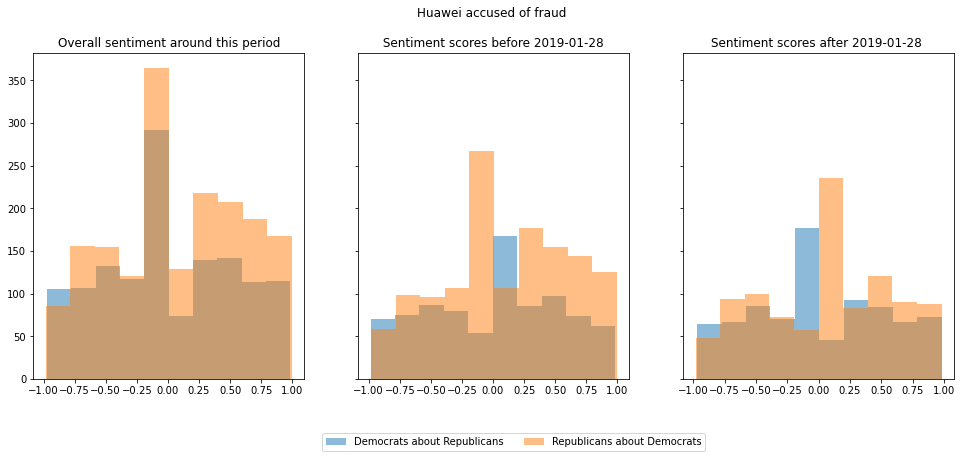

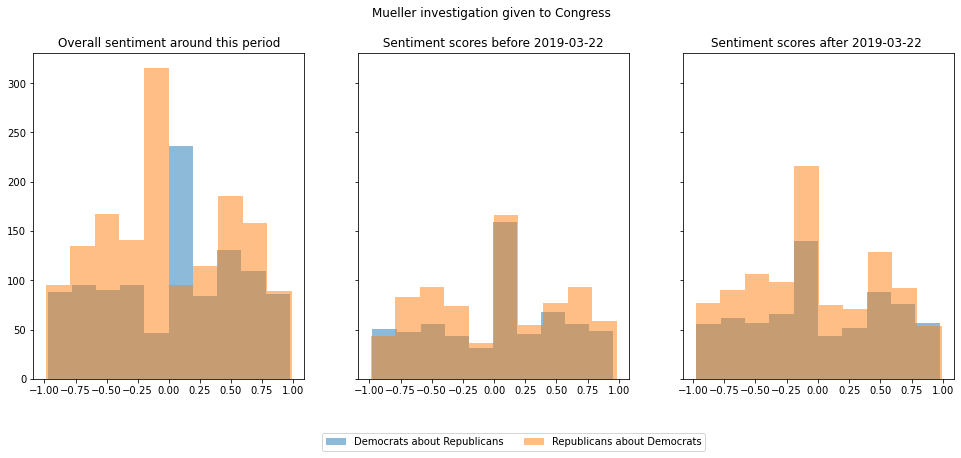

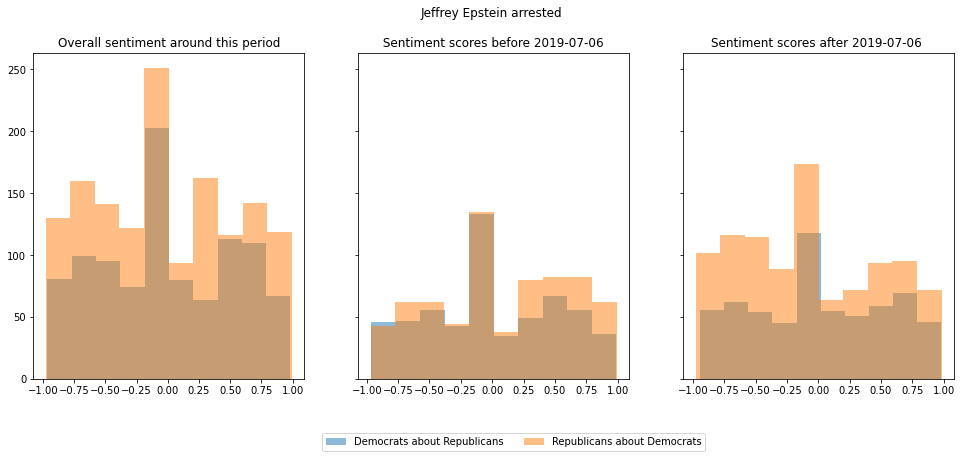

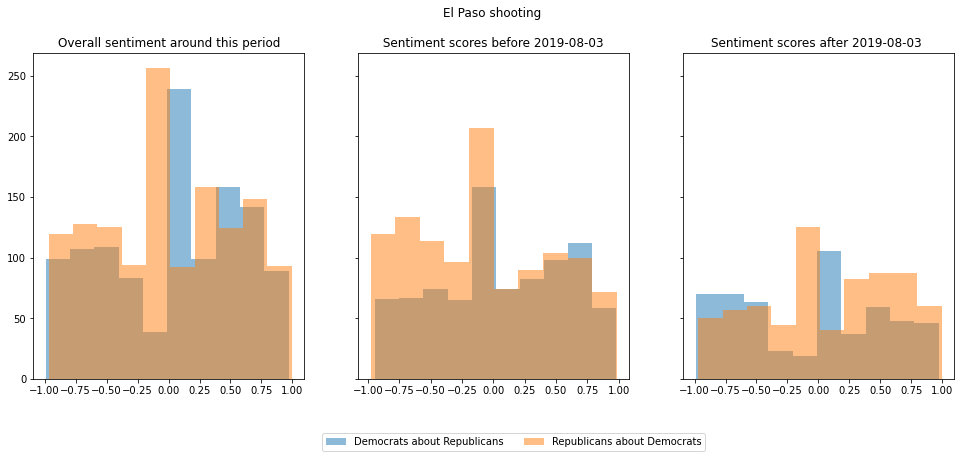

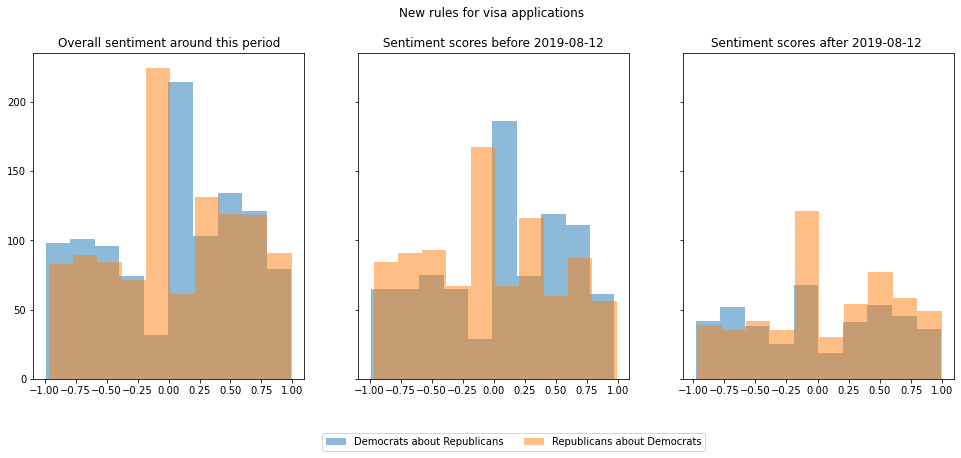

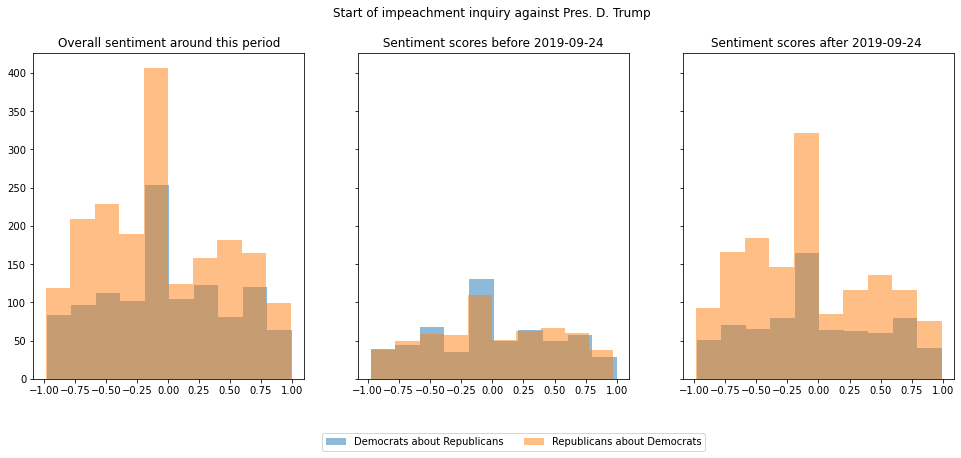

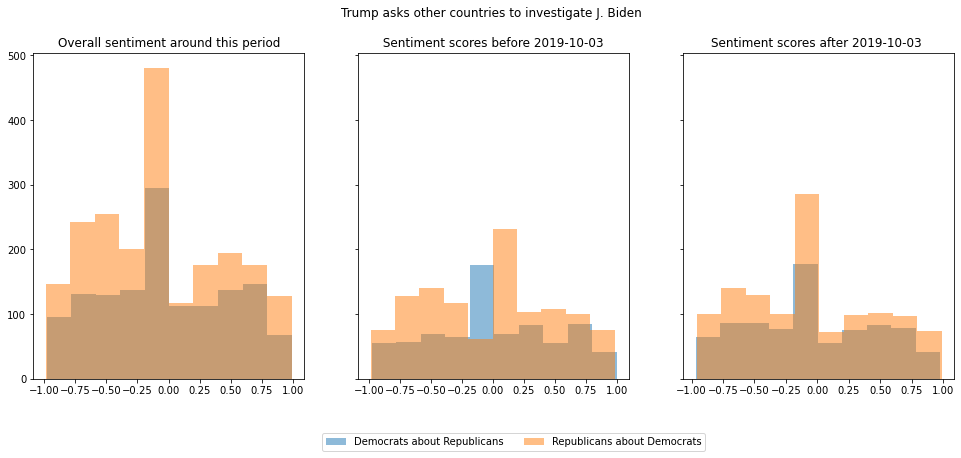

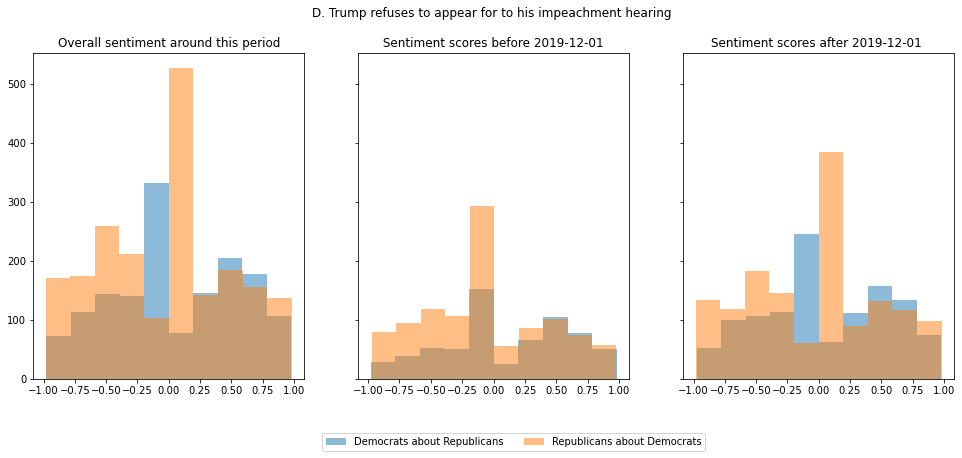

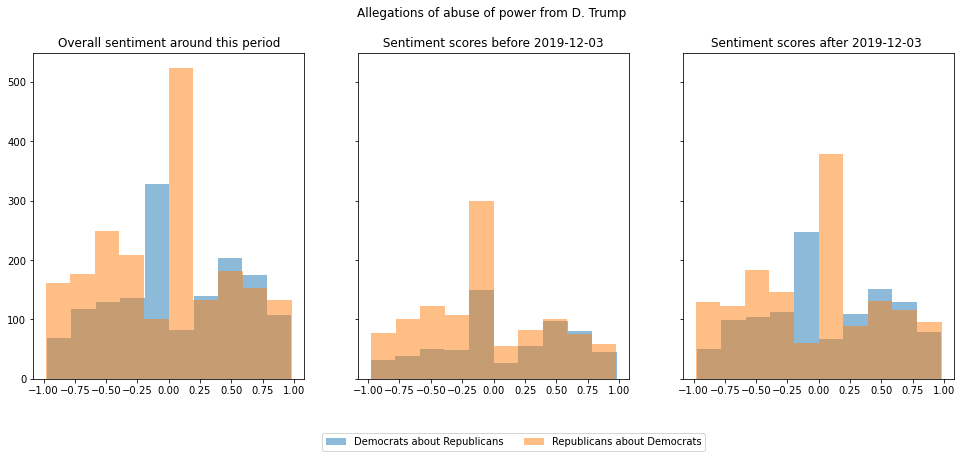

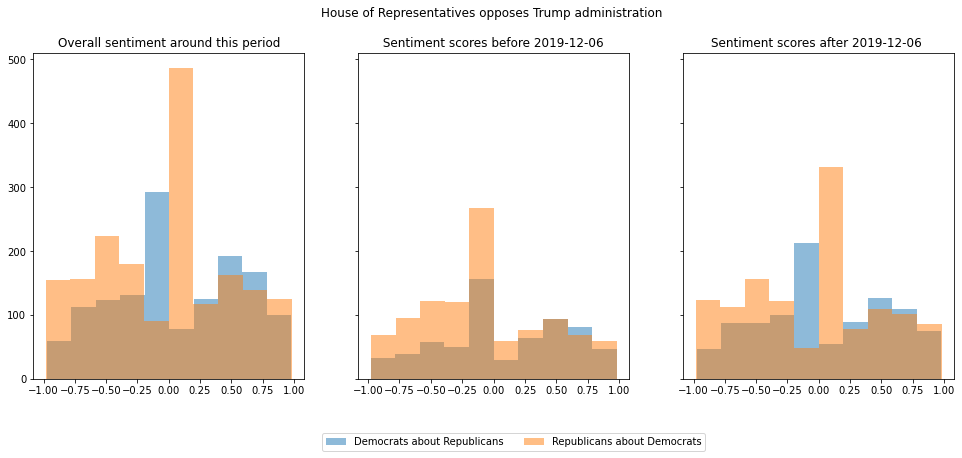

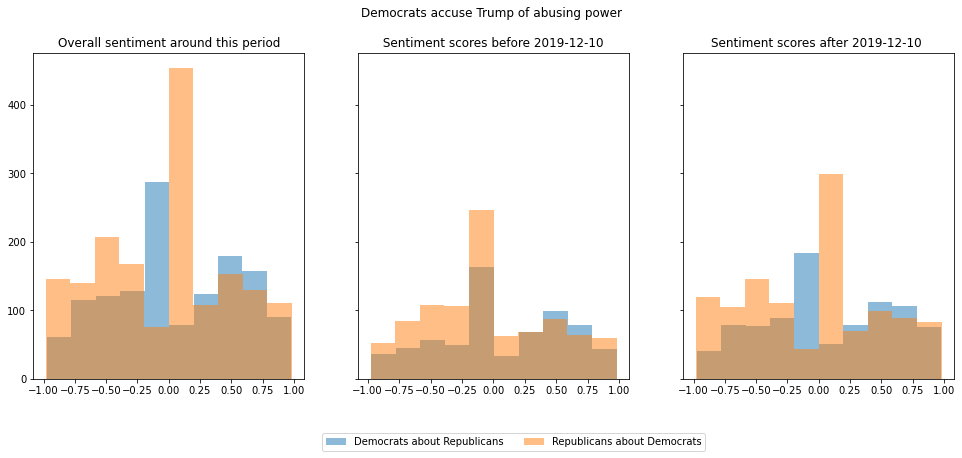

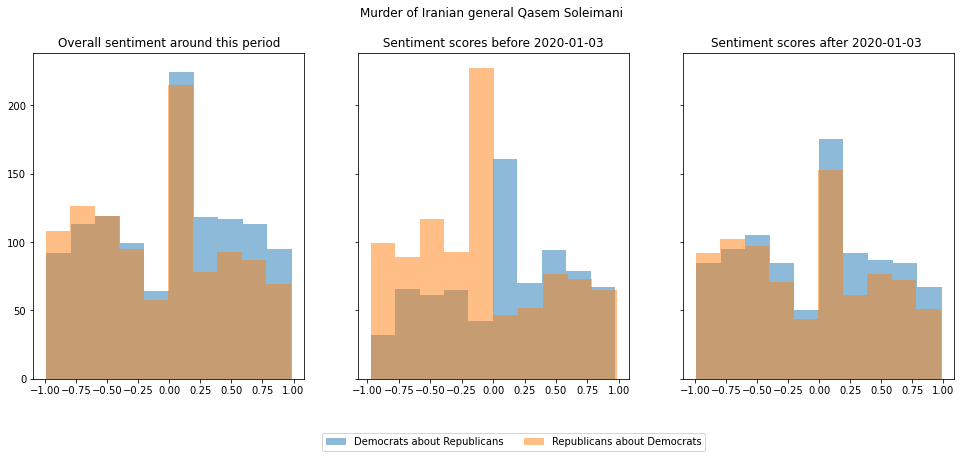

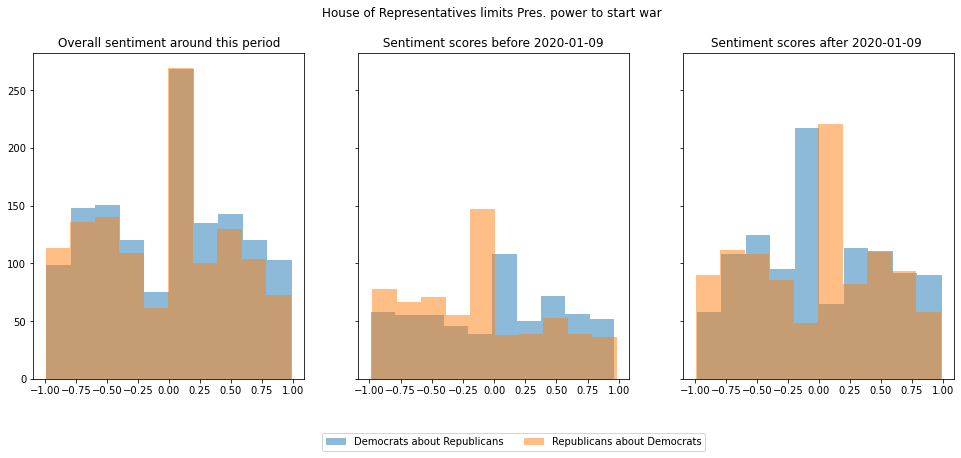

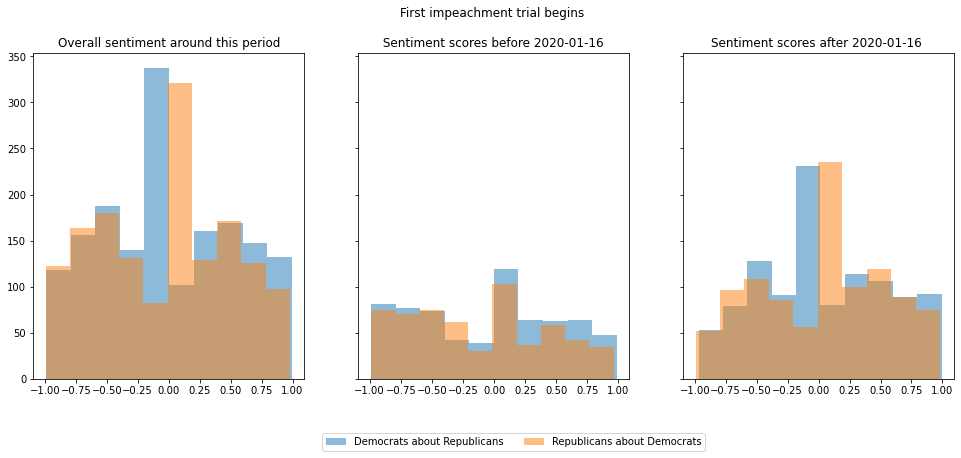

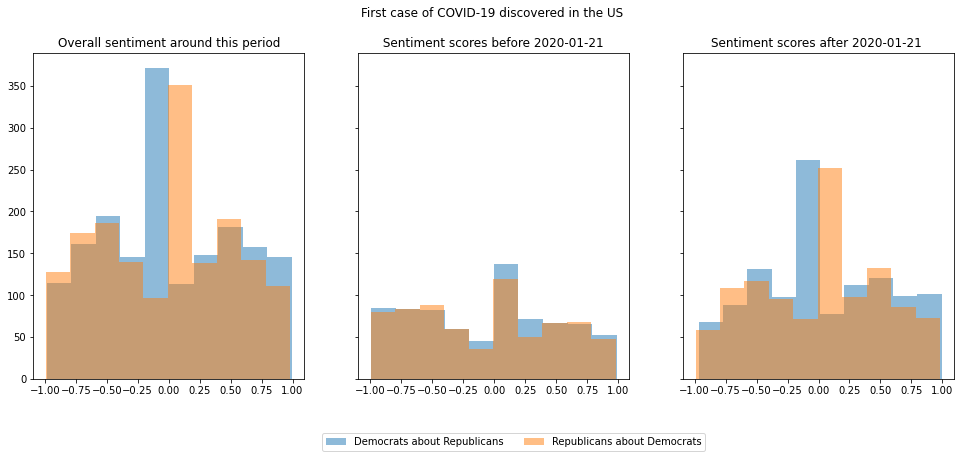

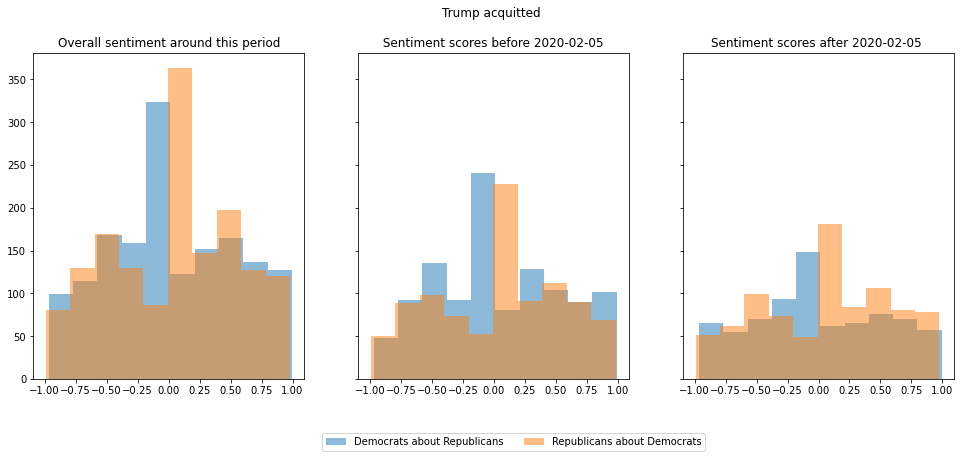

In [439]:
i = 0
for key_event in events.date:
    fig, axes = plt.subplots(1, 3, sharey=True, figsize=(16.5,6))
    axes[0].hist(df_dem[(df_dem['date'] < (key_event + timedelta(weeks=3))) & (df_dem['date'] > (key_event - timedelta(weeks=2)))]['compound'], alpha = 0.5, label ="Democrats about Republicans");
    axes[0].hist(df_rep[(df_rep['date'] < (key_event + timedelta(weeks=3))) & (df_rep['date'] > (key_event - timedelta(weeks=2)))]['compound'], alpha = 0.5, label ="Republicans about Democrats");
    axes[0].set_title('Overall sentiment around this period')
    axes[1].hist(df_dem[(df_dem['date'] > (key_event - timedelta(weeks=3))) & (df_dem['date'] <= key_event)]['compound'], alpha = 0.5, label ="Democrats about Republicans");
    axes[1].hist(df_rep[(df_rep['date'] > (key_event - timedelta(weeks=3))) & (df_rep['date'] <= key_event)]['compound'], alpha = 0.5, label ="Republicans about Democrats");
    axes[1].set_title('{} \n \n Sentiment scores before {} '.format(events[events['date'] == key_event]['short_desc'][i], key_event.date()))
    axes[2].hist(df_dem[(df_dem['date'] < (key_event + timedelta(weeks=3))) & (df_dem['date'] >= key_event)]['compound'], alpha = 0.5, label ="Democrats about Republicans");
    axes[2].hist(df_rep[(df_rep['date'] < (key_event + timedelta(weeks=3))) & (df_rep['date'] >= key_event)]['compound'], alpha = 0.5, label ="Republicans about Democrats");
    axes[2].set_title('Sentiment scores after {} '.format(key_event.date()))
    axes[0].legend(bbox_to_anchor =(2.5, -0.15), ncol = 2)
    i = i + 1

### 1 week prior and after event

C:\Users\rened\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


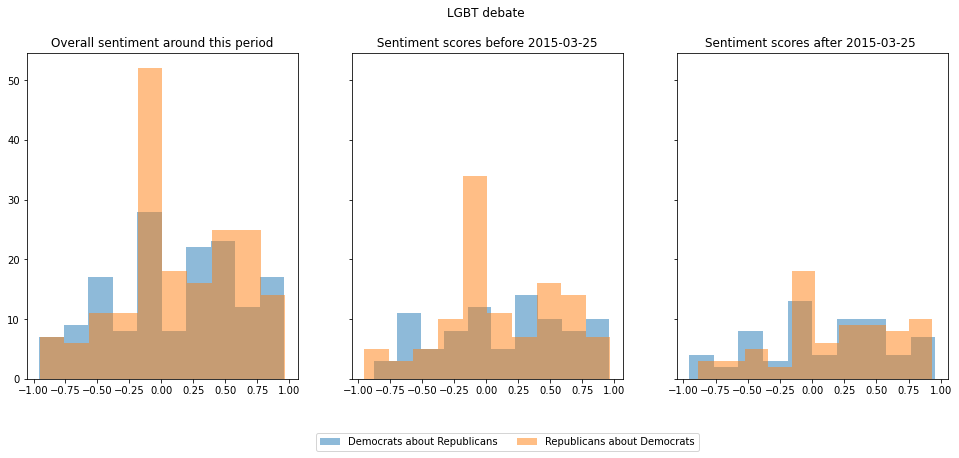

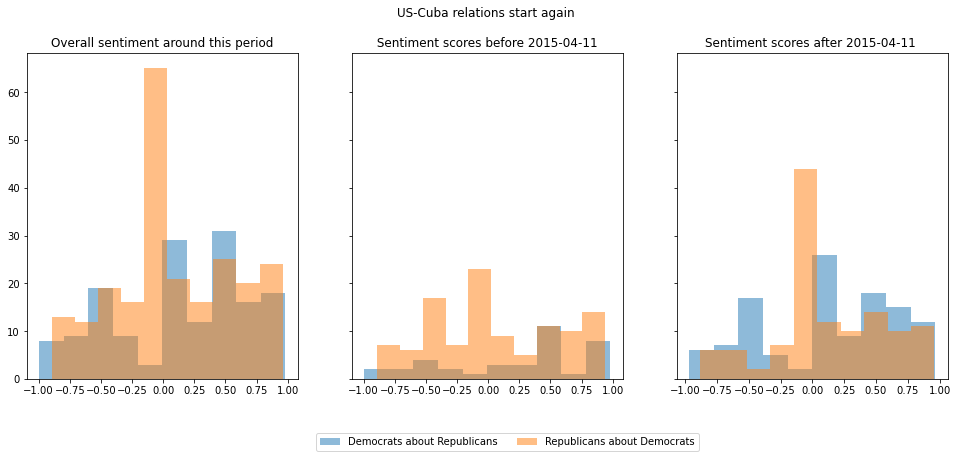

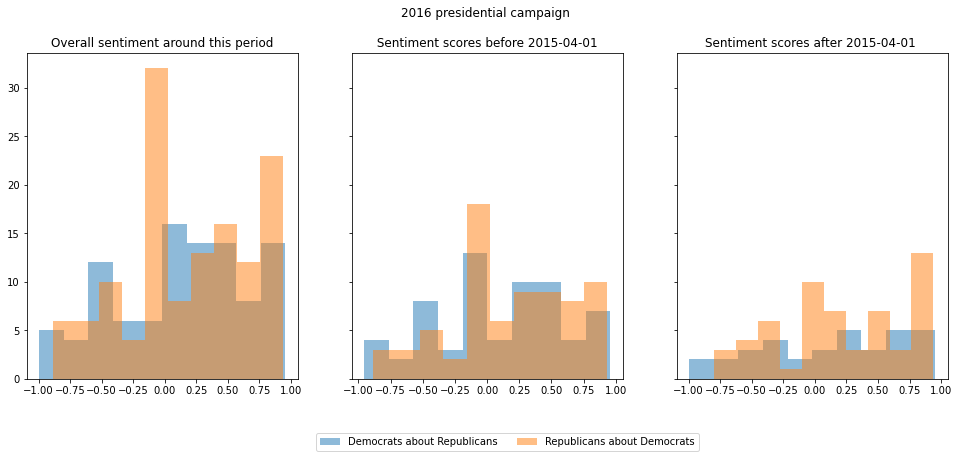

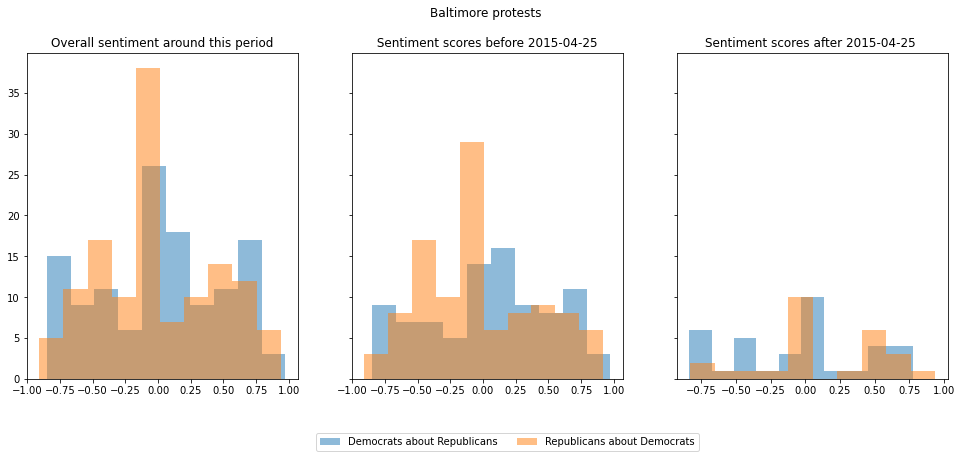

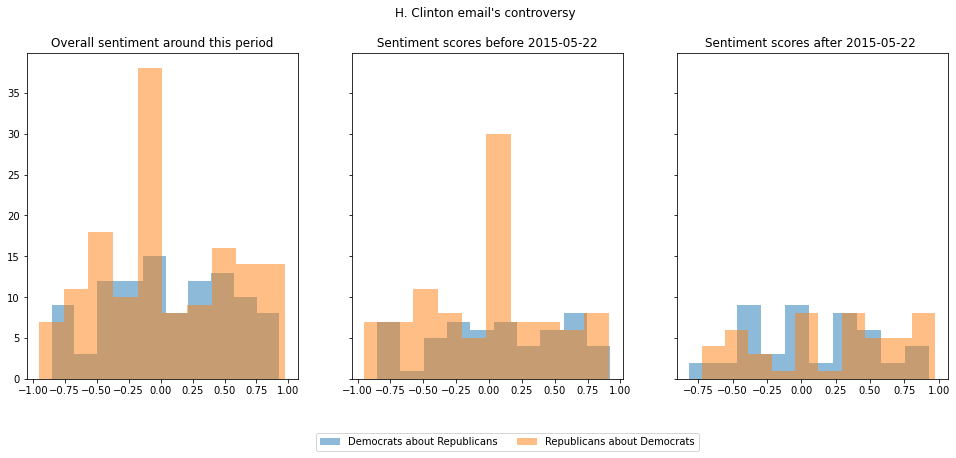

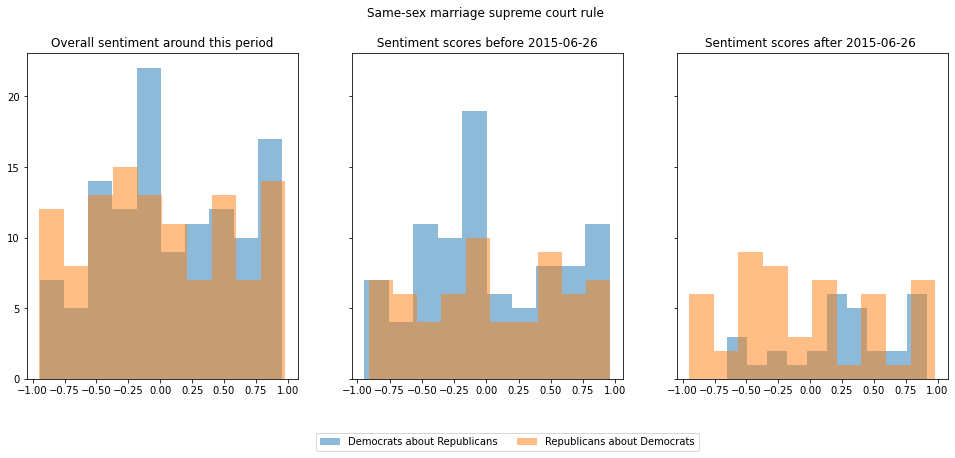

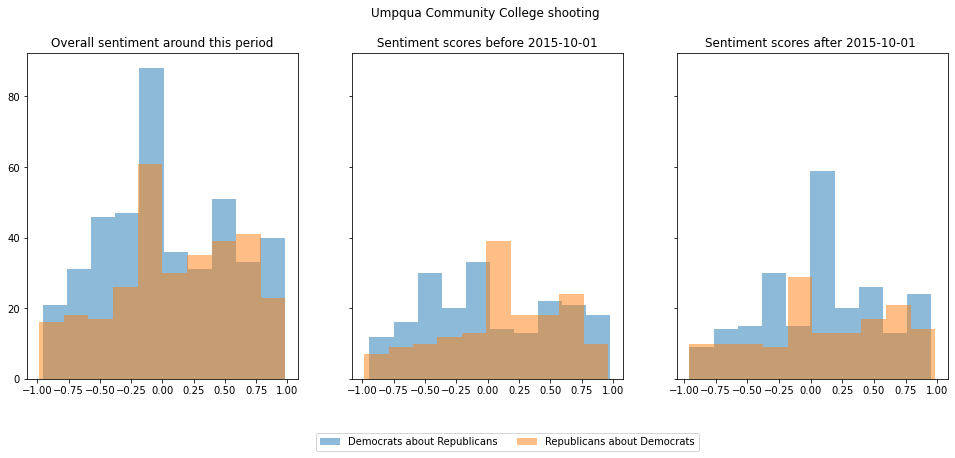

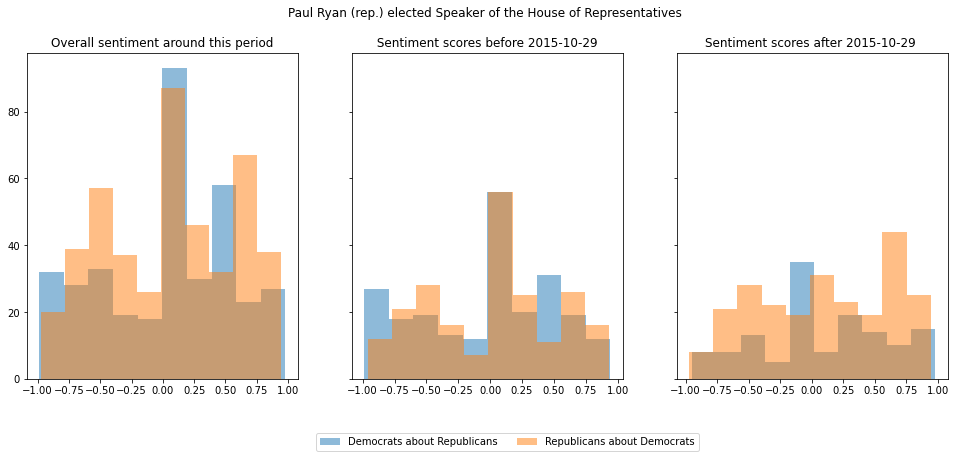

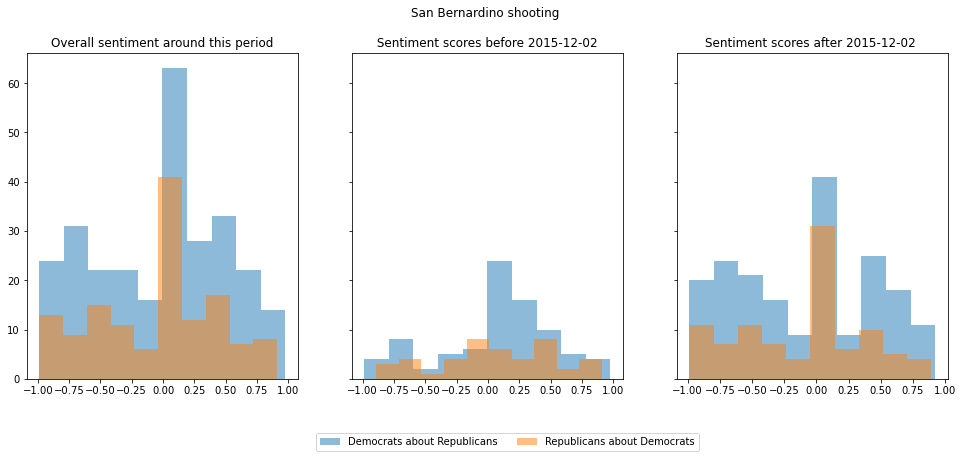

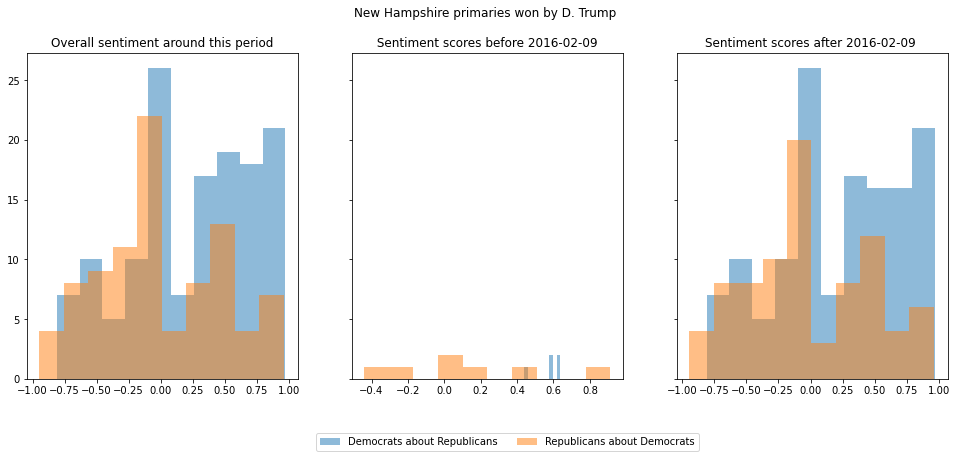

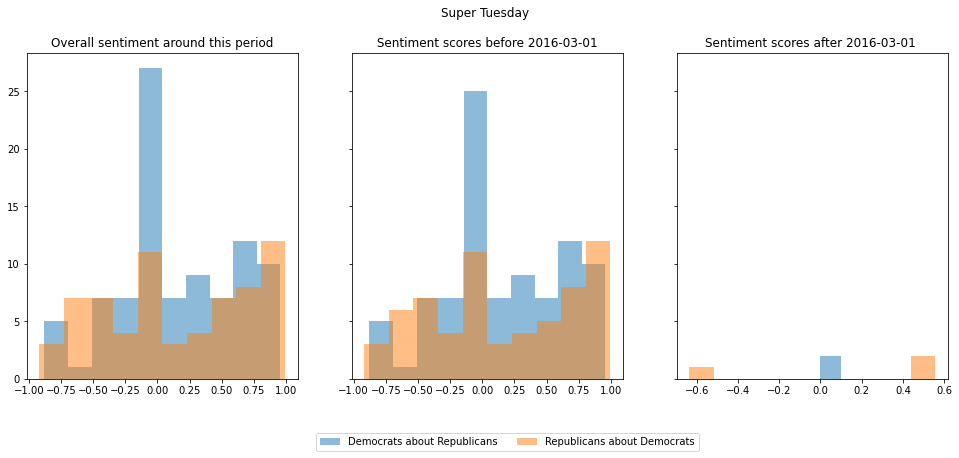

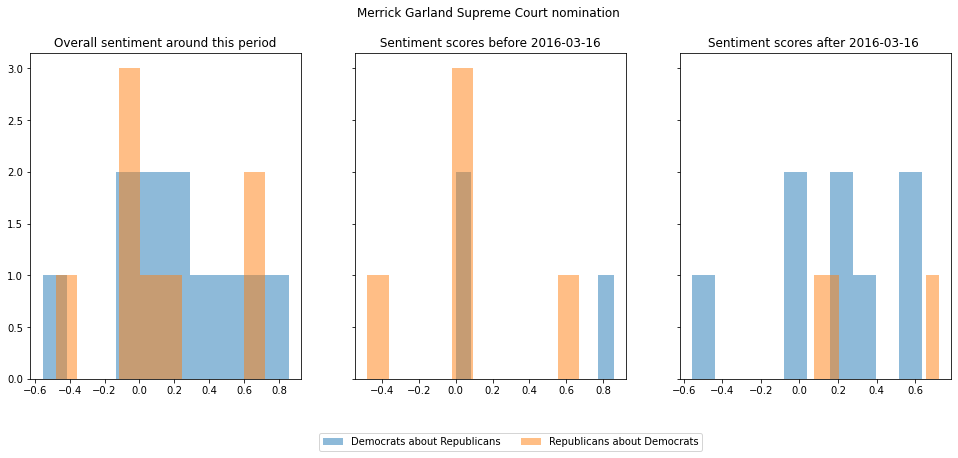

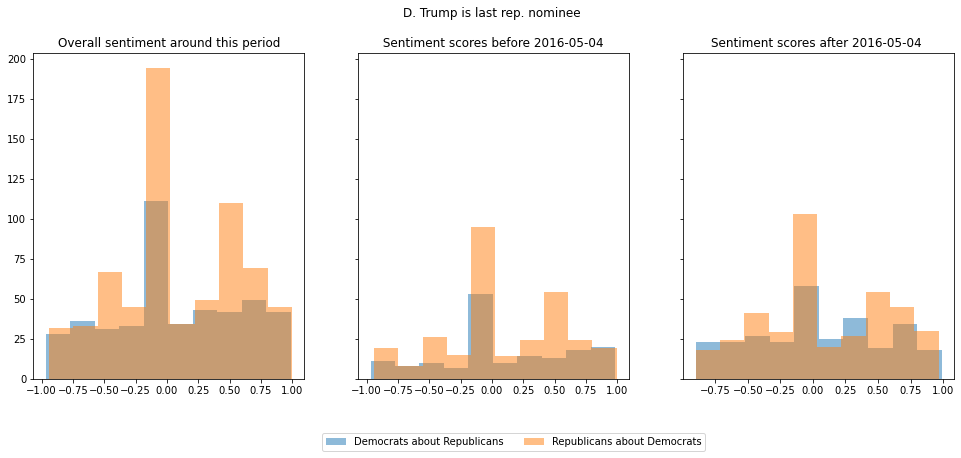

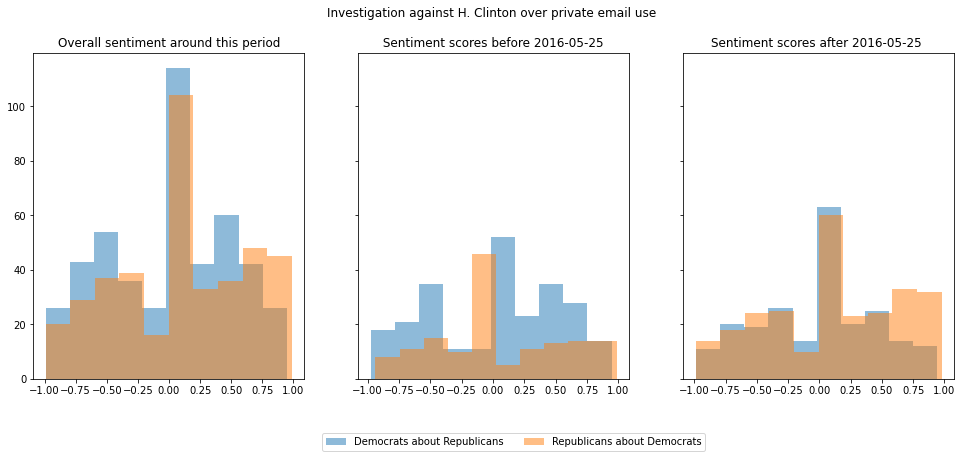

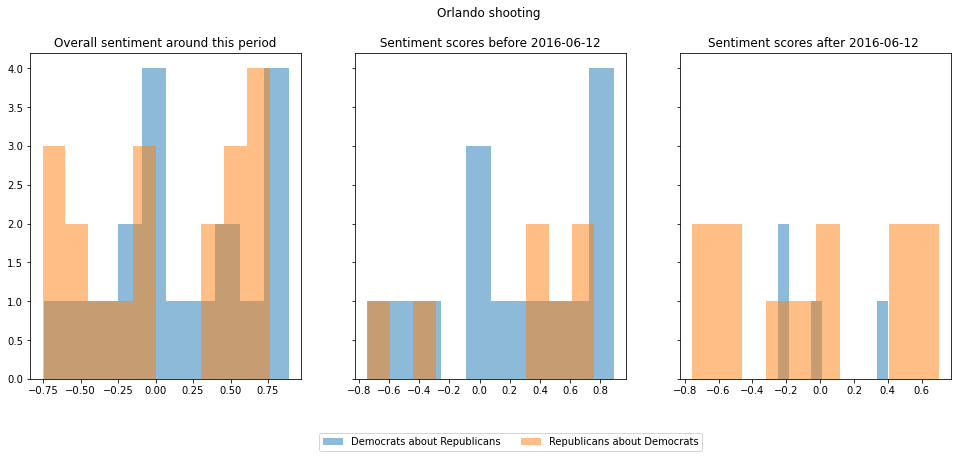

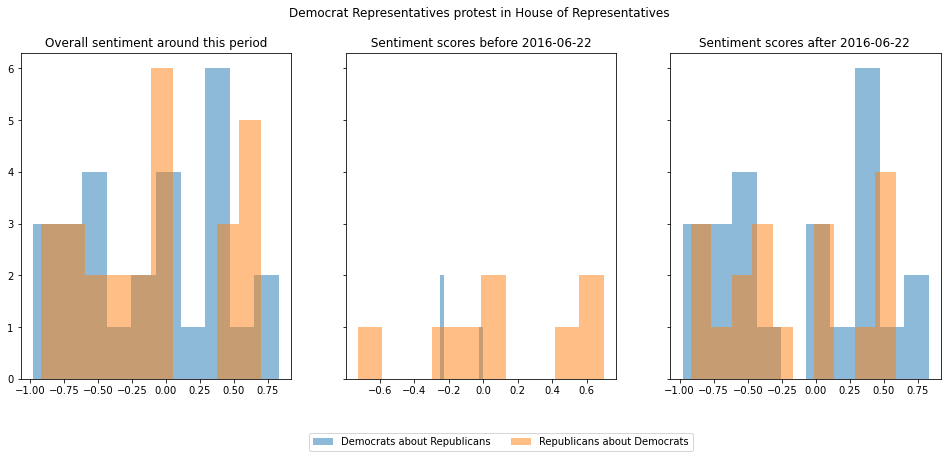

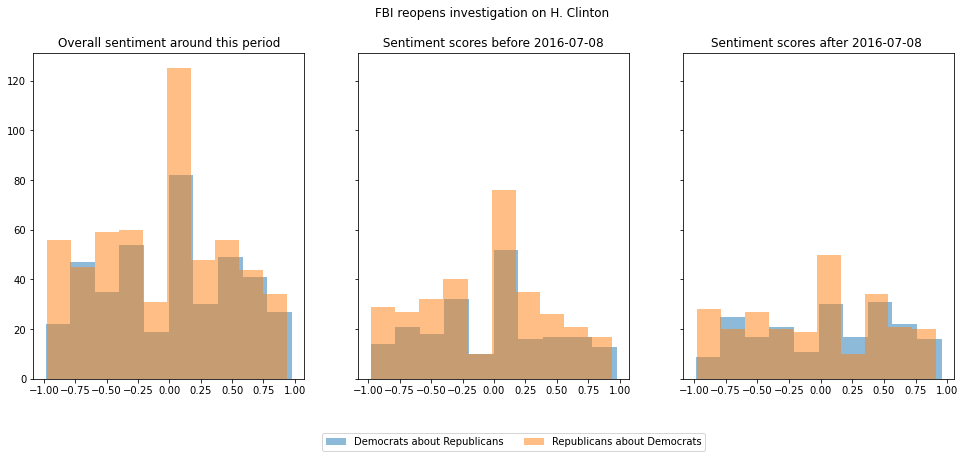

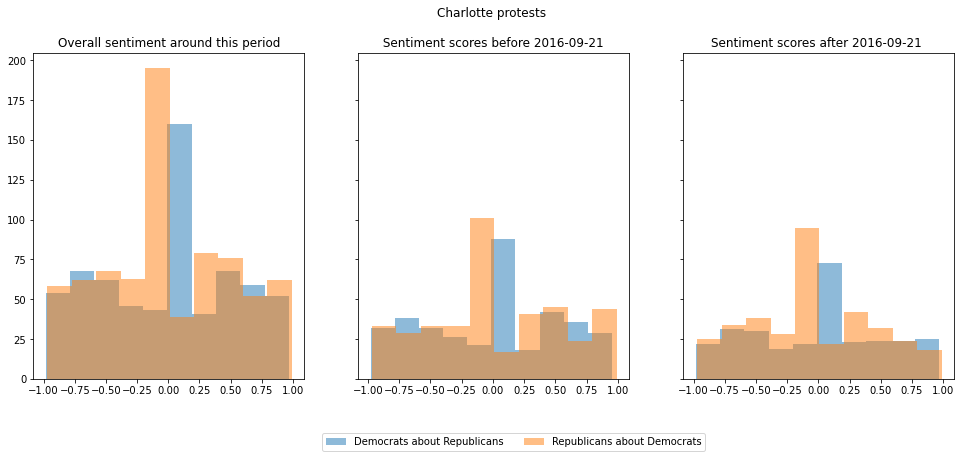

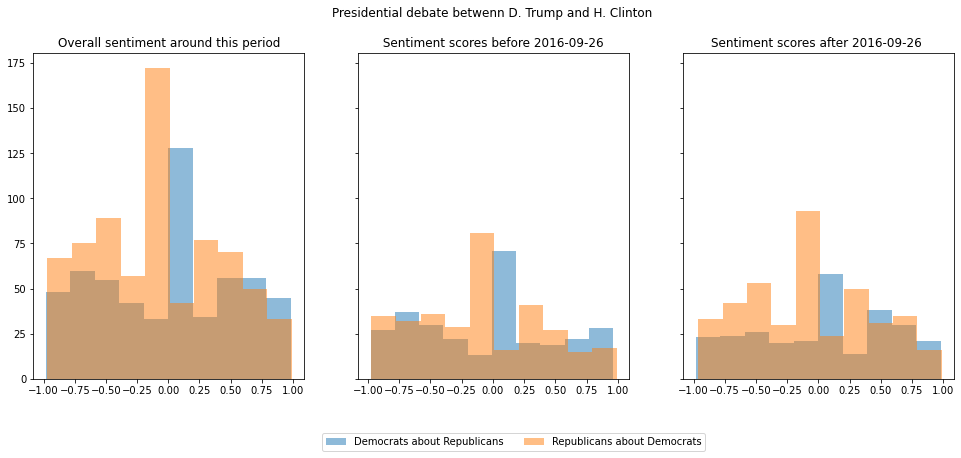

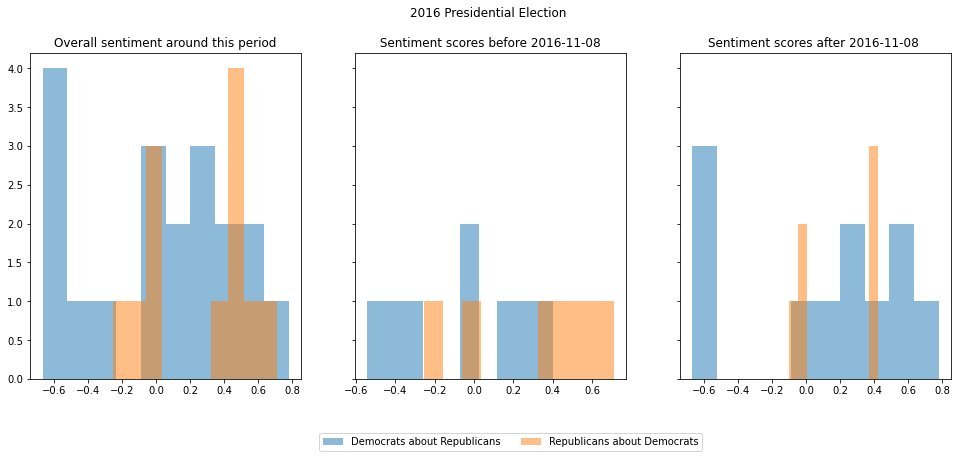

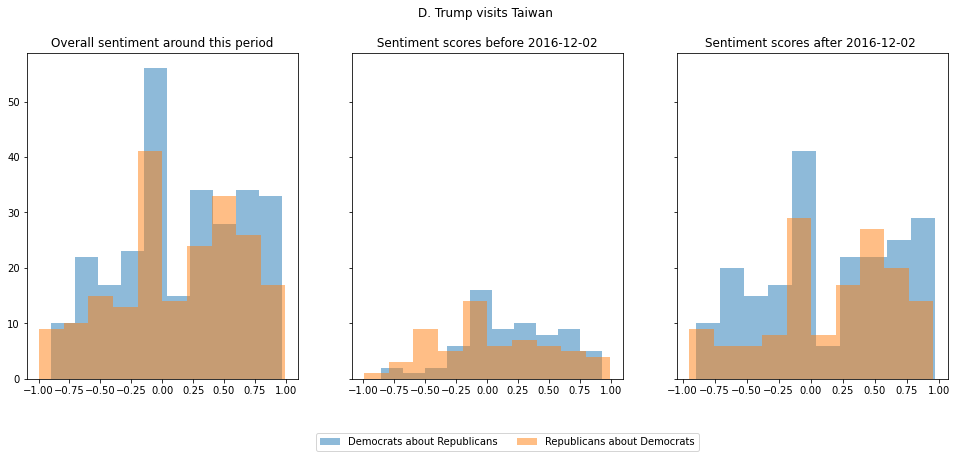

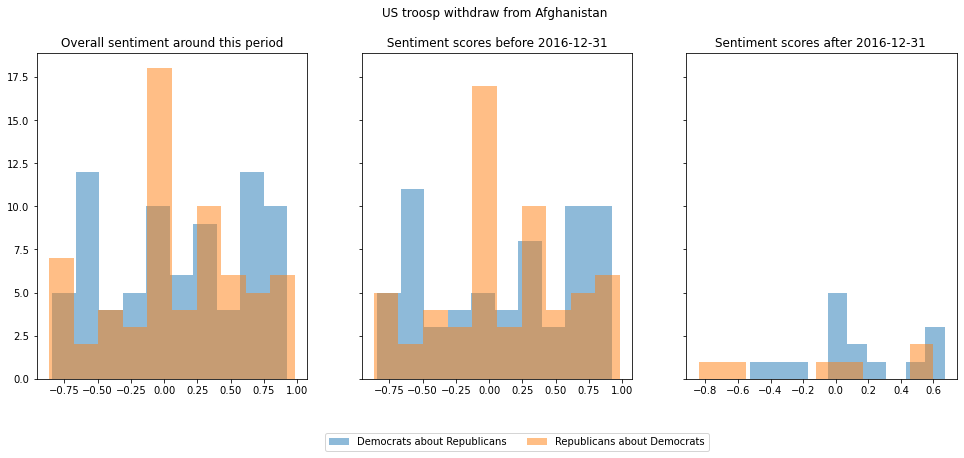

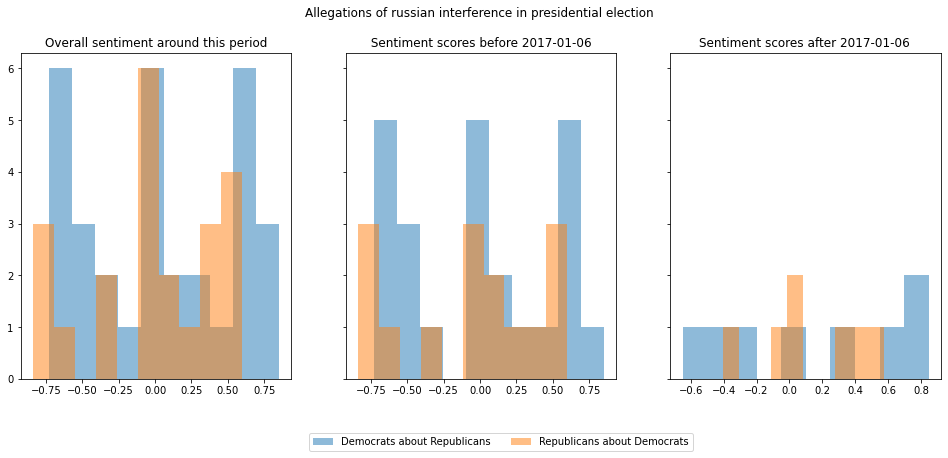

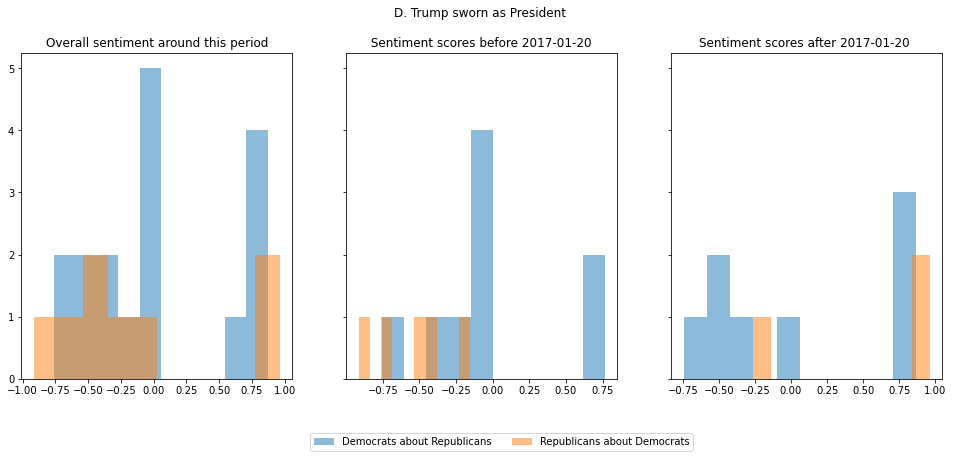

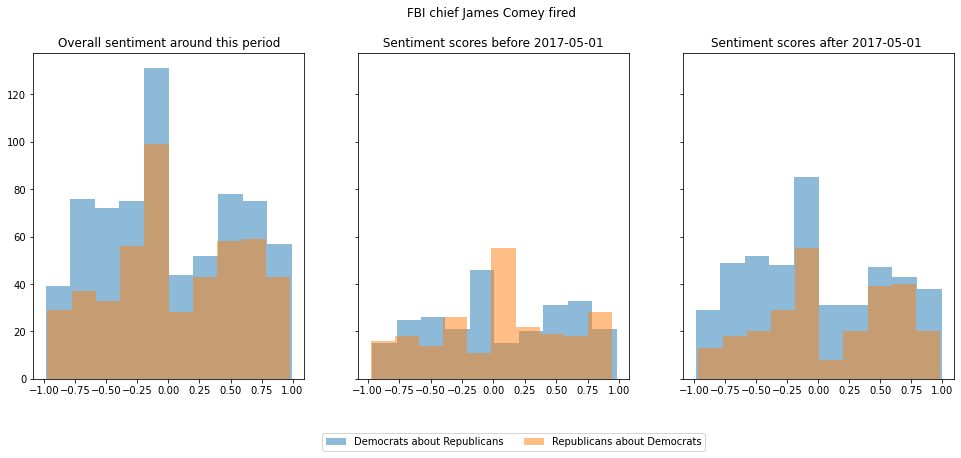

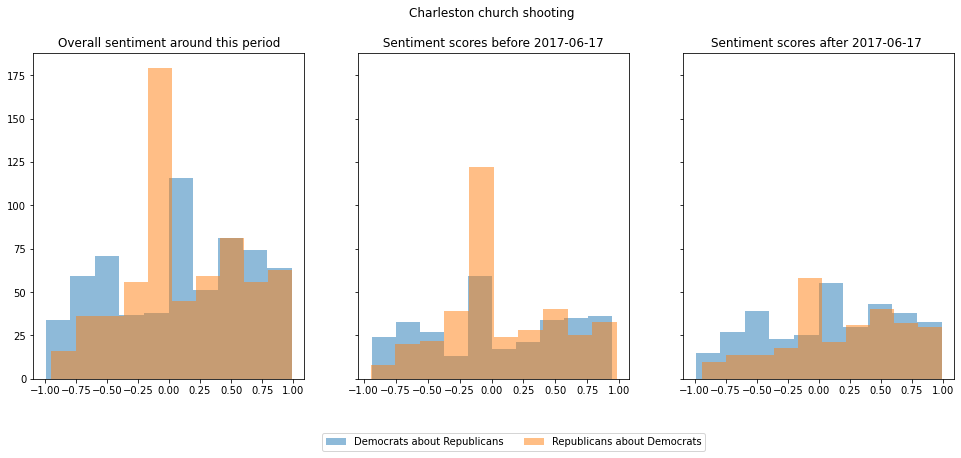

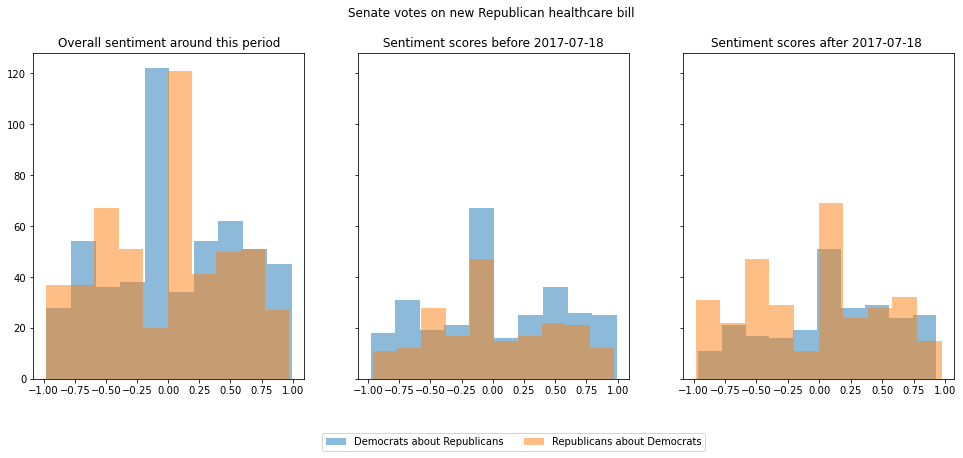

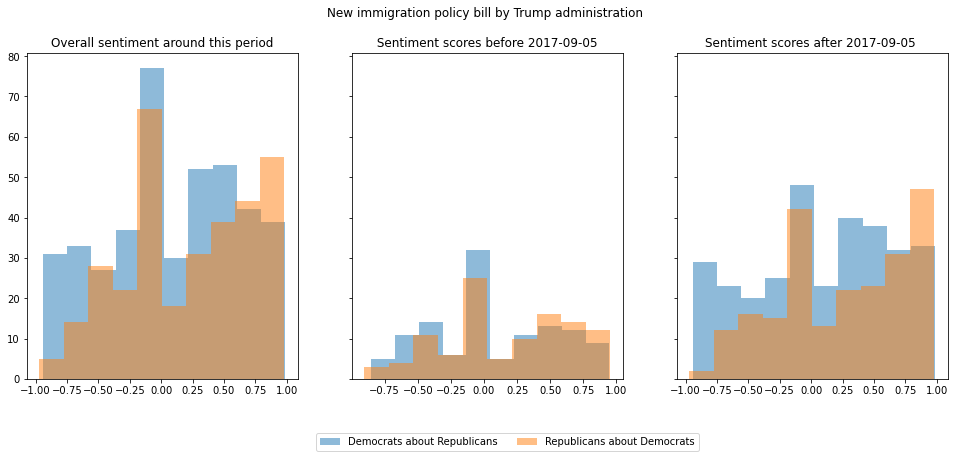

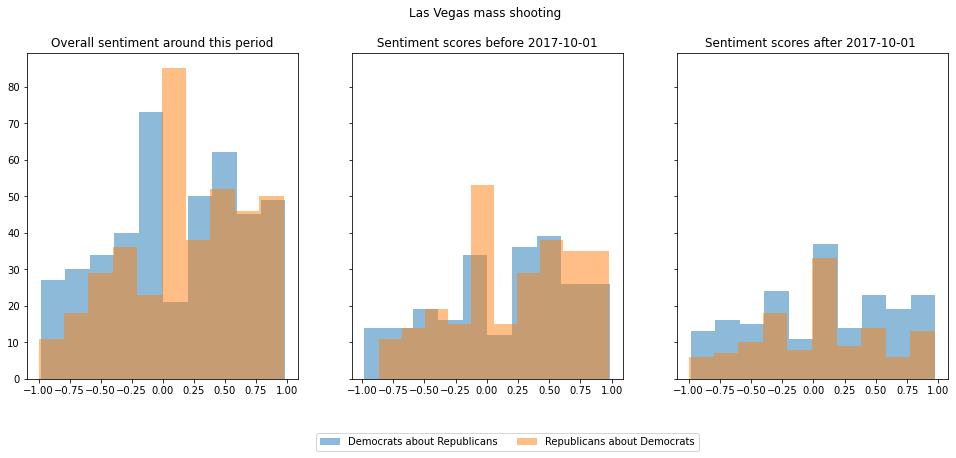

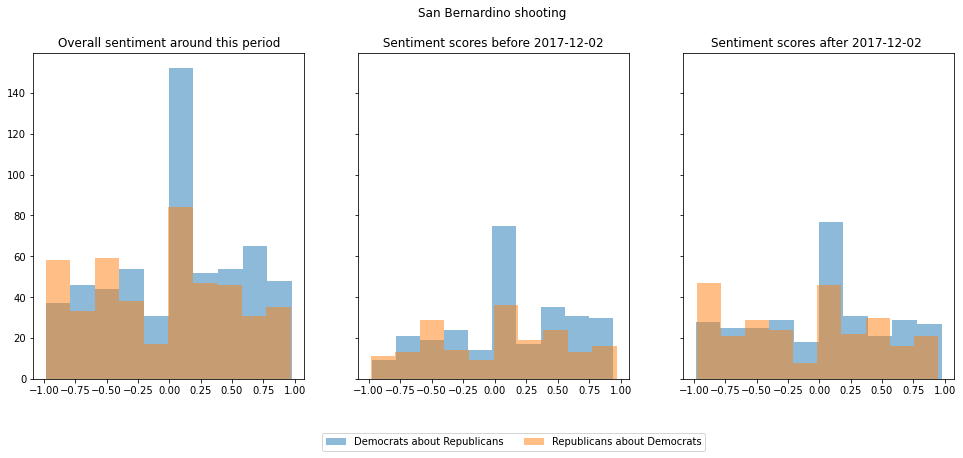

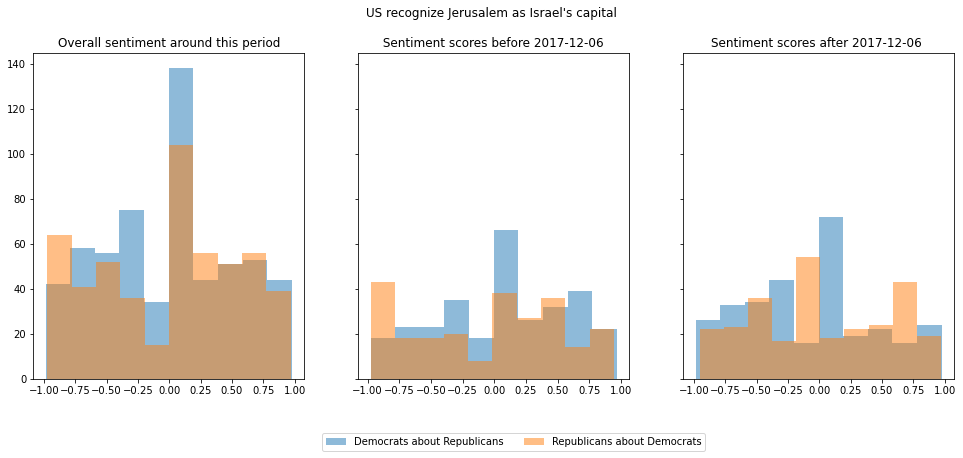

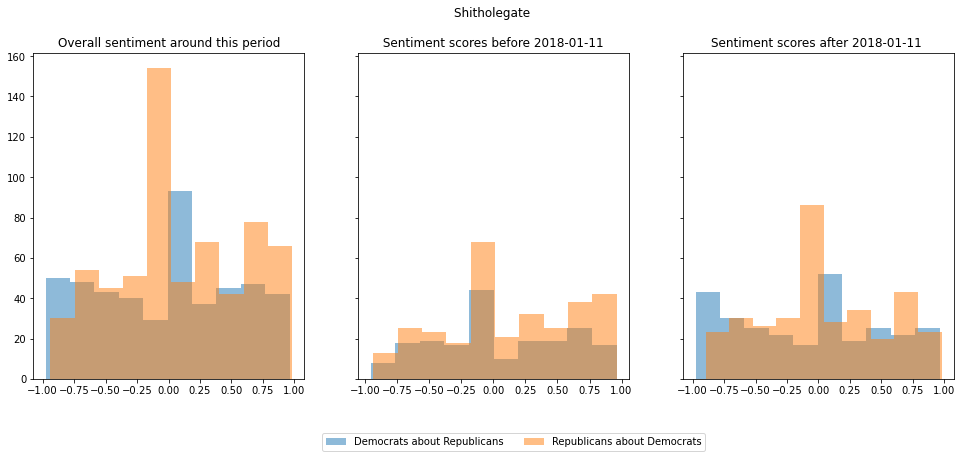

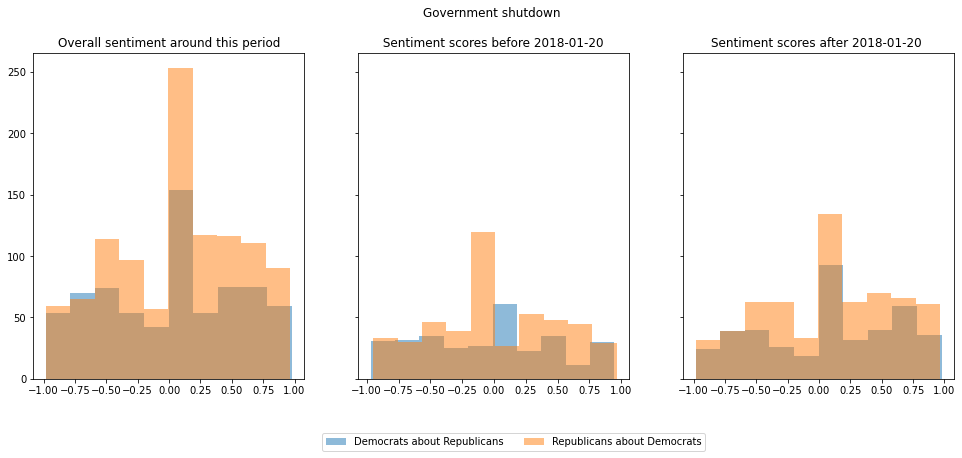

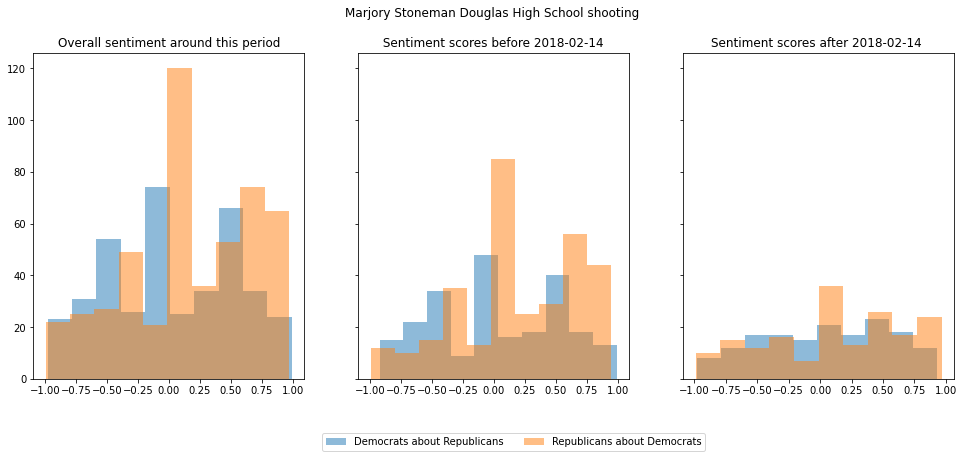

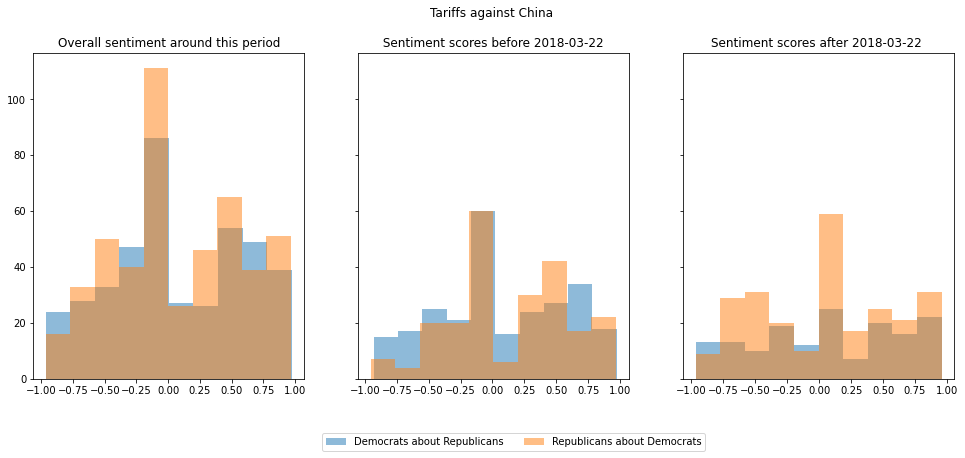

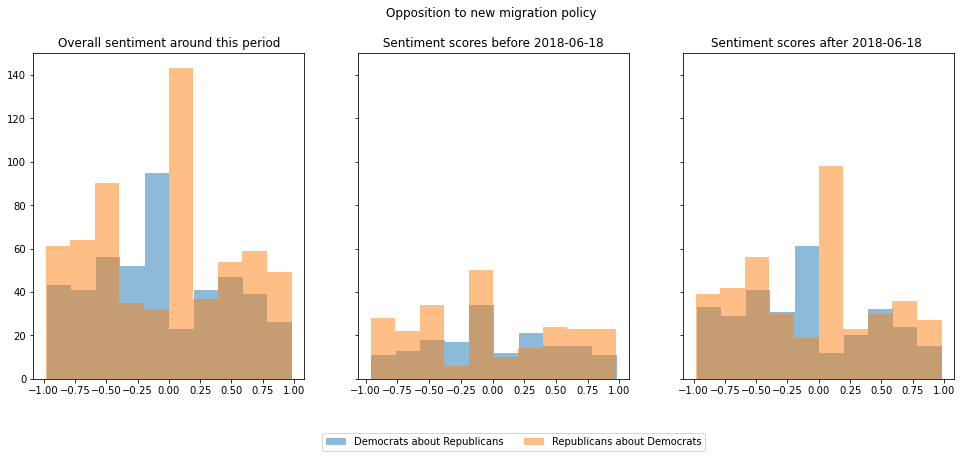

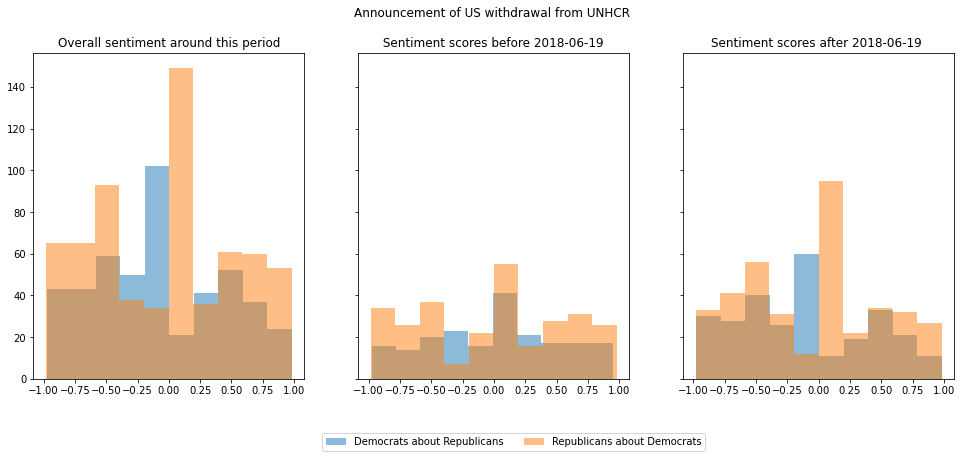

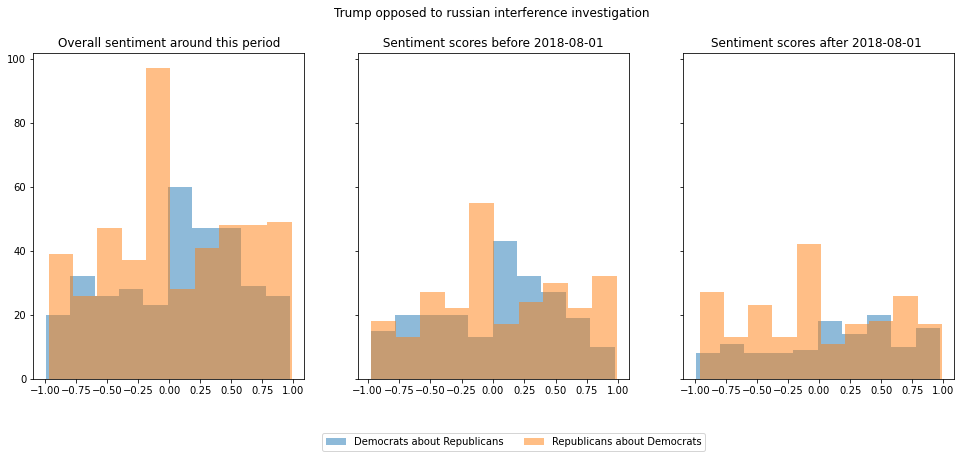

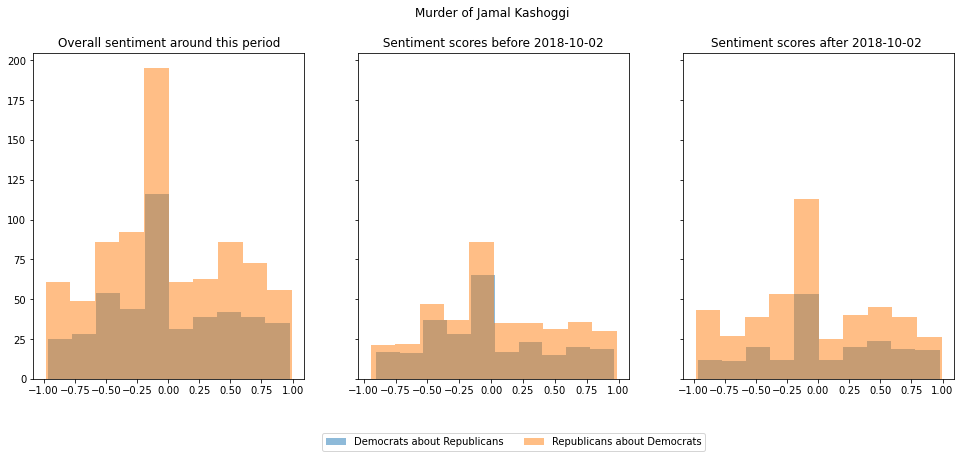

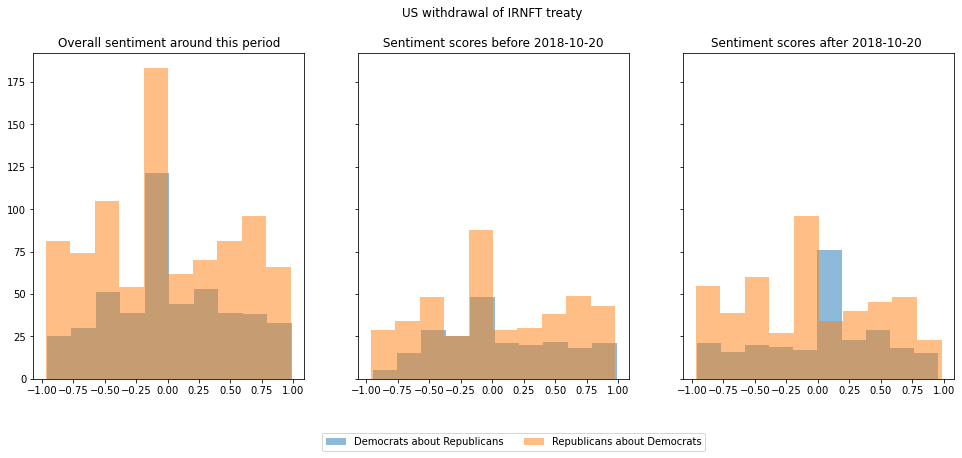

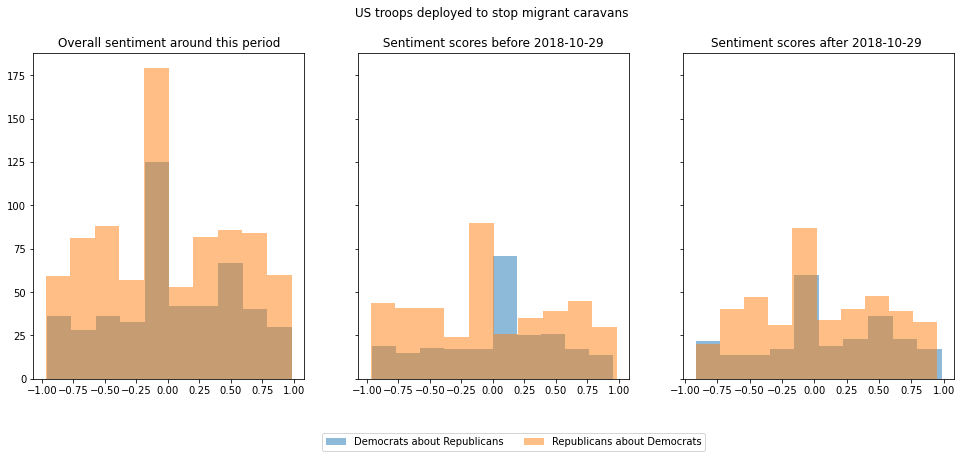

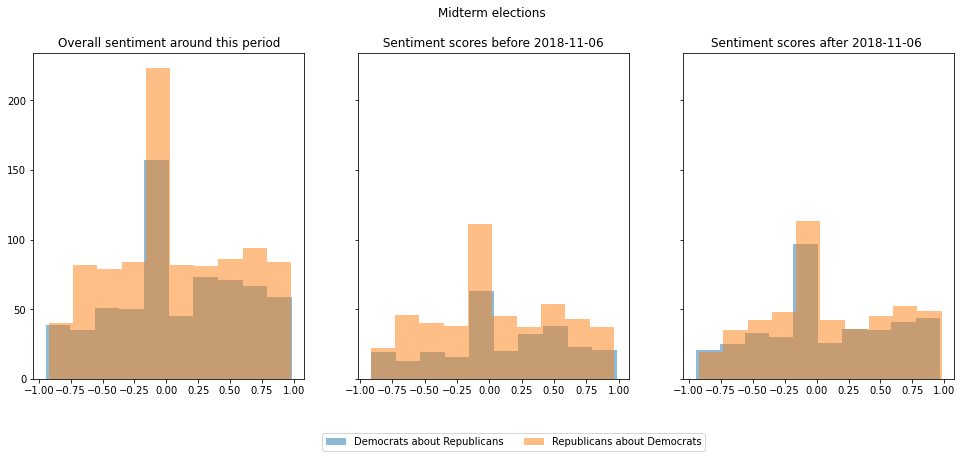

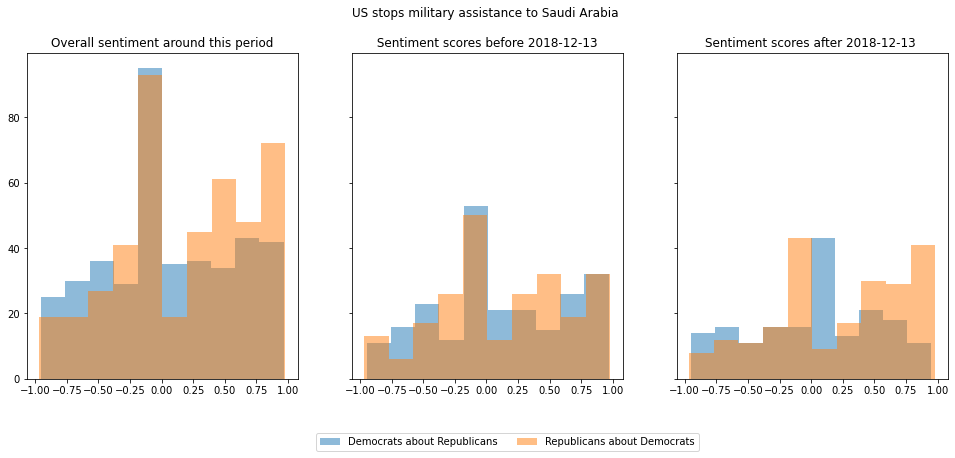

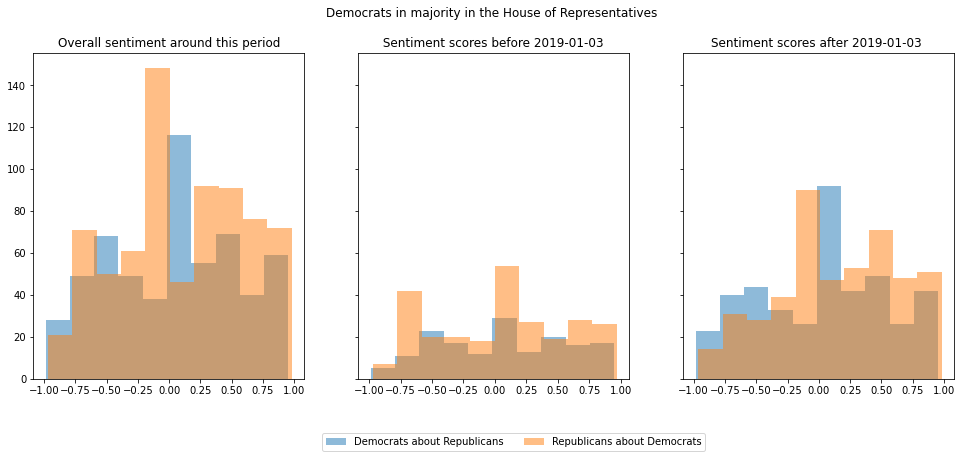

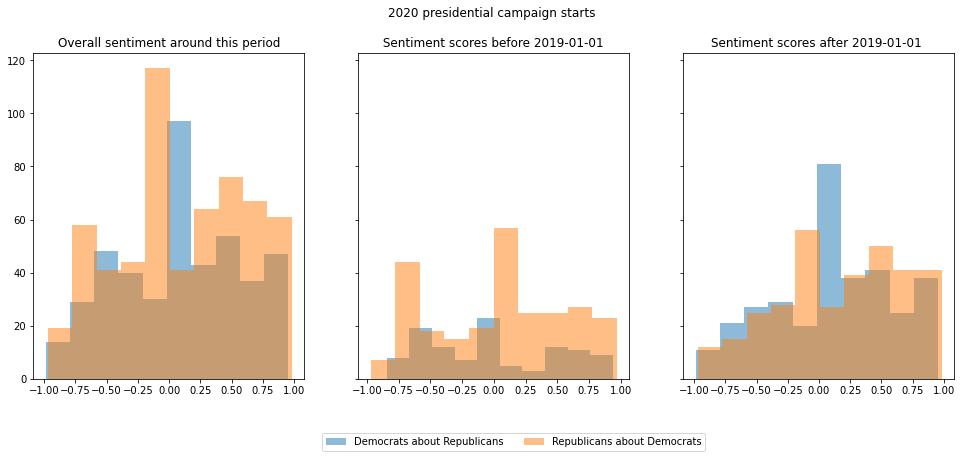

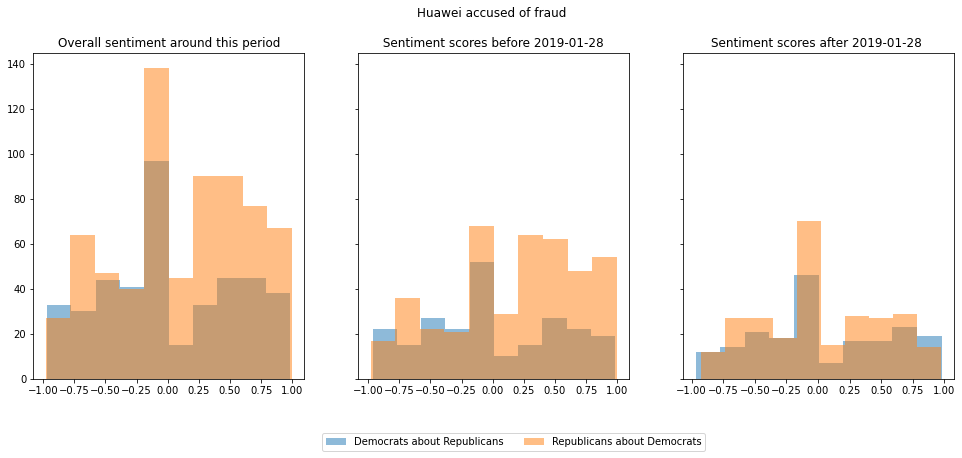

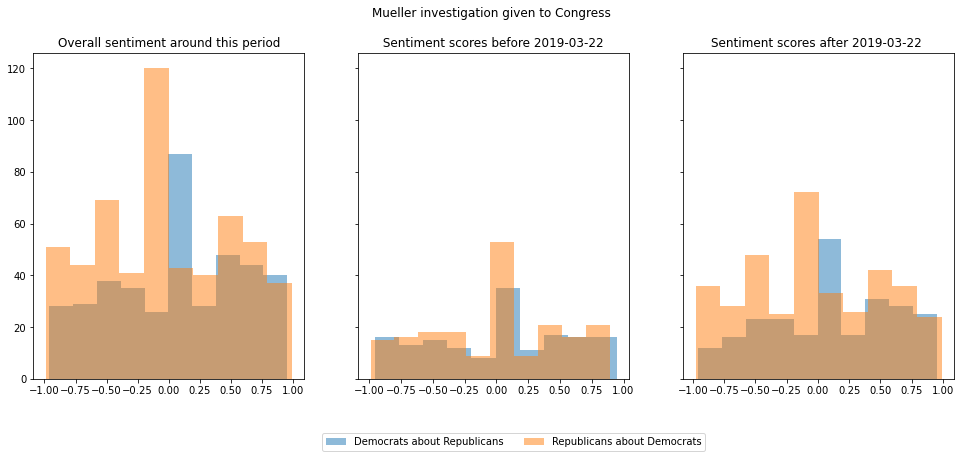

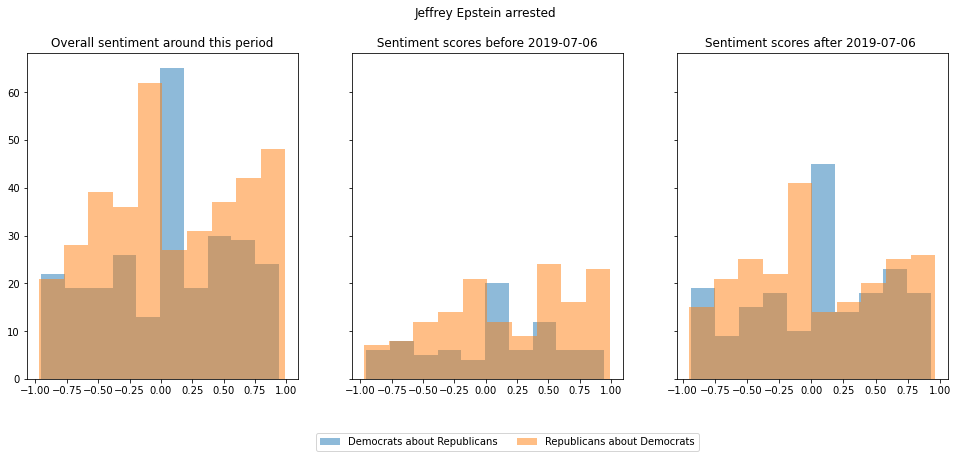

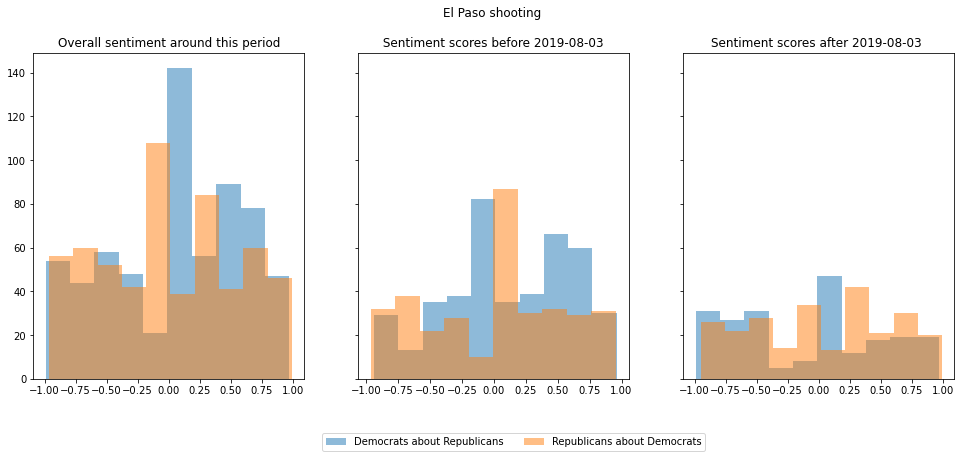

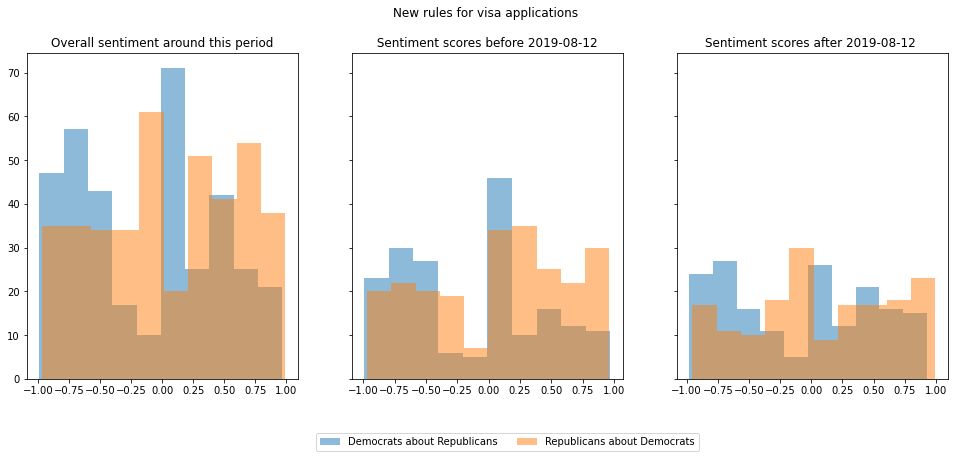

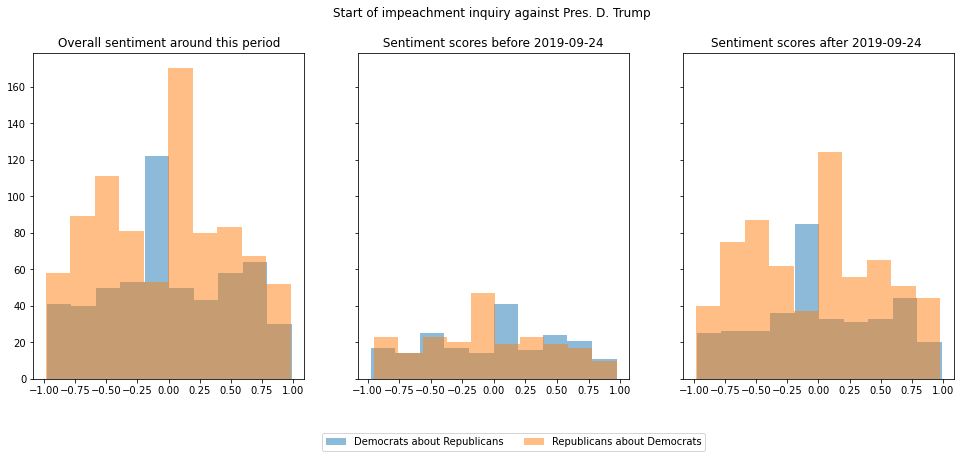

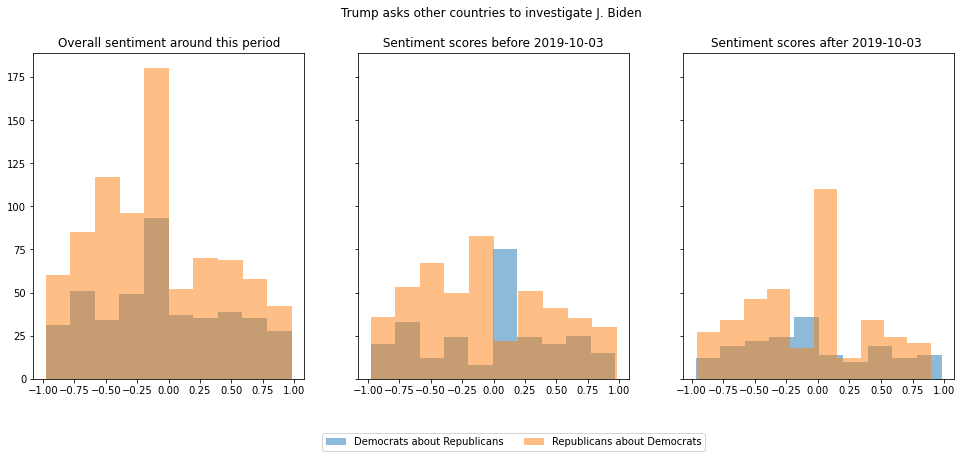

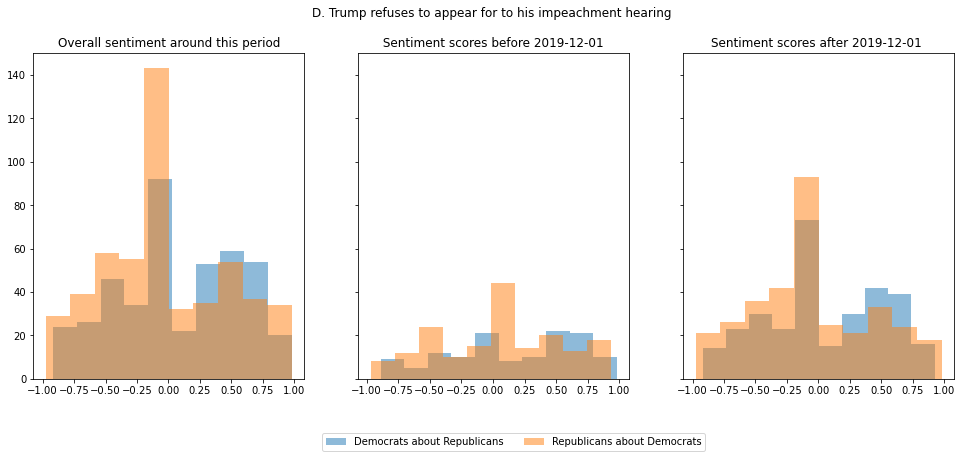

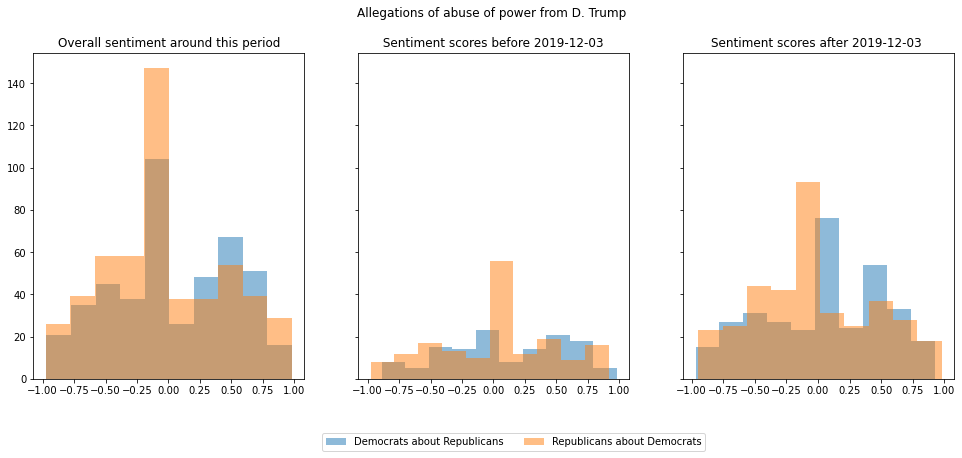

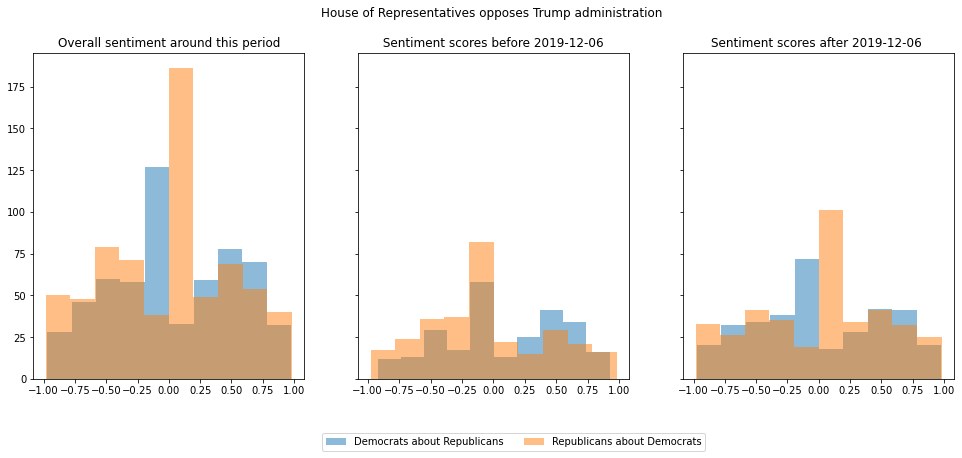

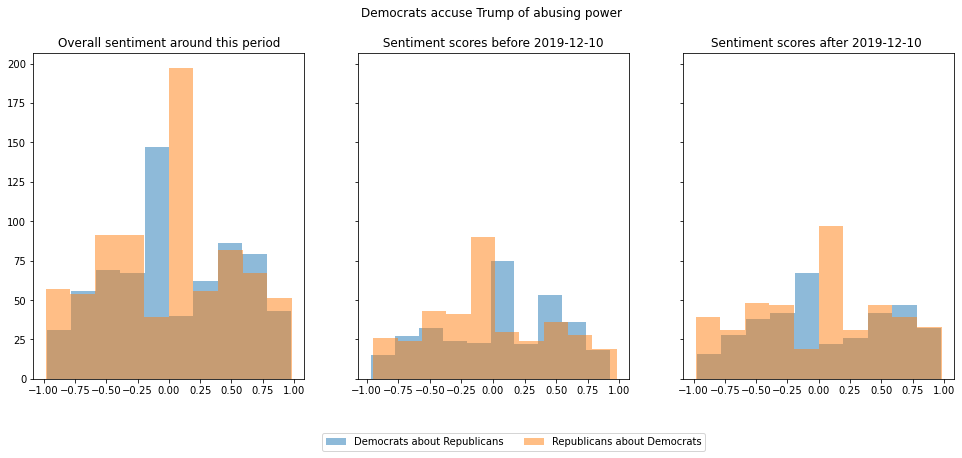

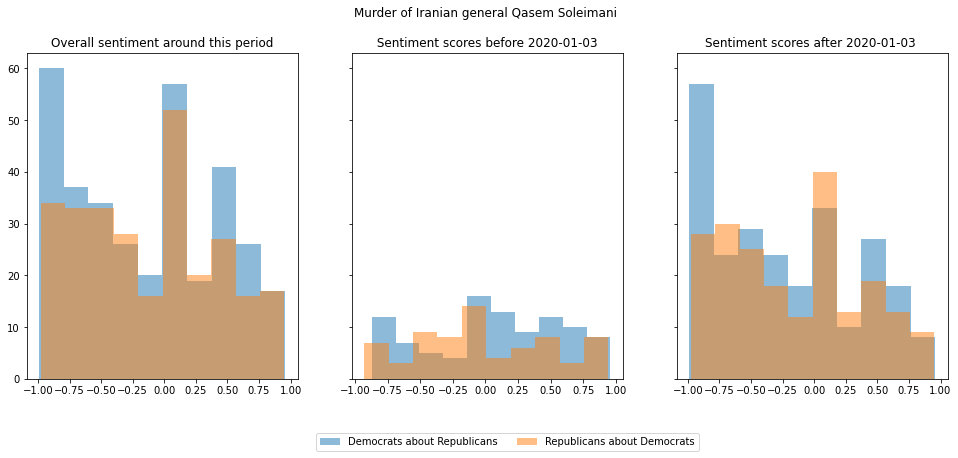

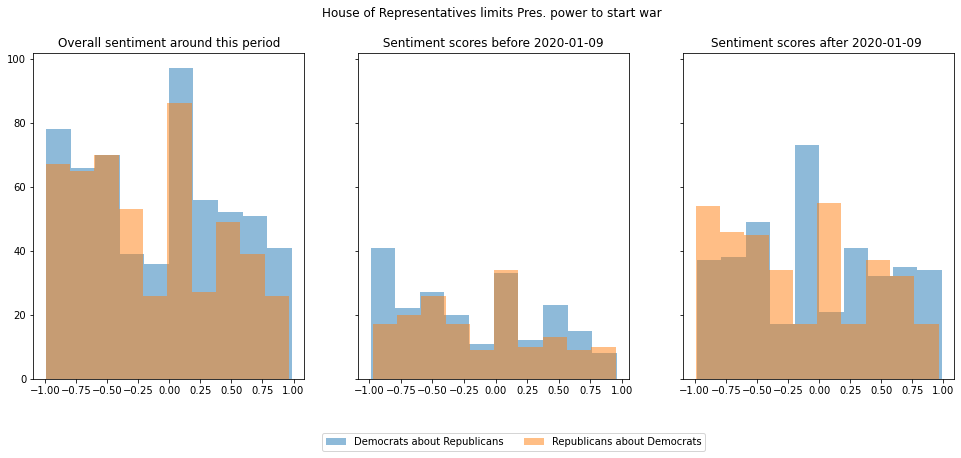

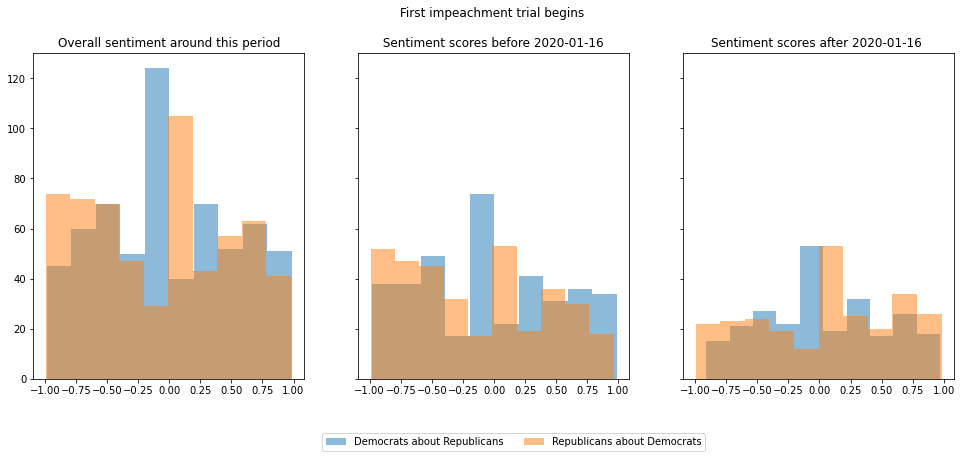

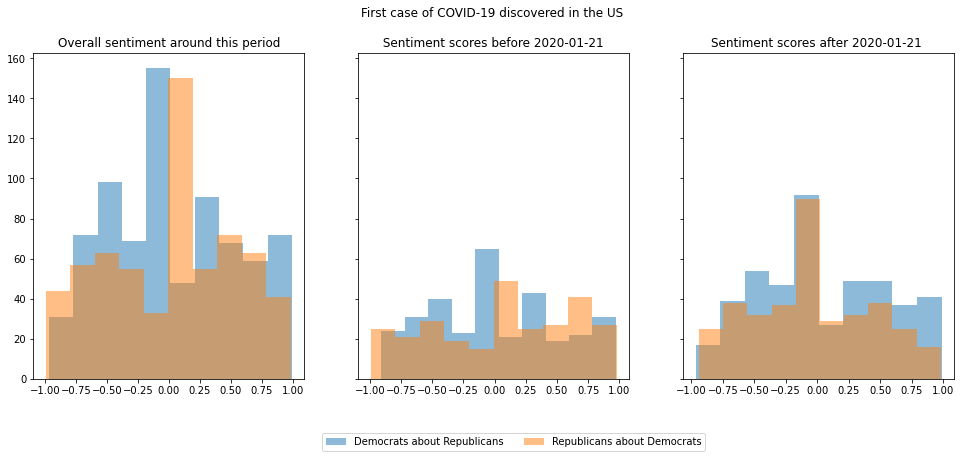

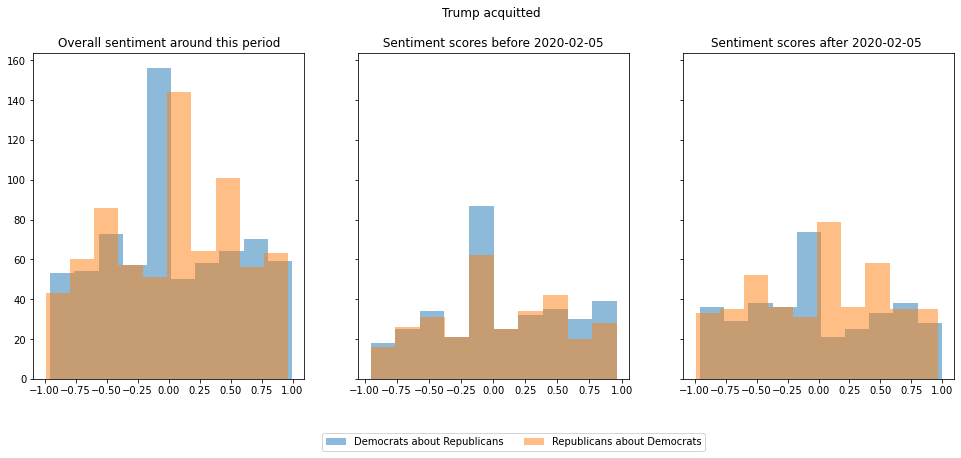

In [369]:
i = 0
for key_event in events.date:
    fig, axes = plt.subplots(1, 3, sharey=True, figsize=(16.5,6))
    axes[0].hist(df_dem[(df_dem['date'] < (key_event + timedelta(weeks=1))) & (df_dem['date'] > (key_event - timedelta(weeks=1)))]['compound'], alpha = 0.5, label ="Democrats about Republicans");
    axes[0].hist(df_rep[(df_rep['date'] < (key_event + timedelta(weeks=1))) & (df_rep['date'] > (key_event - timedelta(weeks=1)))]['compound'], alpha = 0.5, label ="Republicans about Democrats");
    axes[0].set_title('Overall sentiment around this period')
    axes[1].hist(df_dem[(df_dem['date'] > (key_event - timedelta(weeks=1))) & (df_dem['date'] <= key_event)]['compound'], alpha = 0.5, label ="Democrats about Republicans");
    axes[1].hist(df_rep[(df_rep['date'] > (key_event - timedelta(weeks=1))) & (df_rep['date'] <= key_event)]['compound'], alpha = 0.5, label ="Republicans about Democrats");
    axes[1].set_title('{} \n \n Sentiment scores before {} '.format(events[events['date'] == key_event]['short_desc'][i], key_event.date()))
    axes[2].hist(df_dem[(df_dem['date'] < (key_event + timedelta(weeks=1))) & (df_dem['date'] >= key_event)]['compound'], alpha = 0.5, label ="Democrats about Republicans");
    axes[2].hist(df_rep[(df_rep['date'] < (key_event + timedelta(weeks=1))) & (df_rep['date'] >= key_event)]['compound'], alpha = 0.5, label ="Republicans about Democrats");
    axes[2].set_title('Sentiment scores after {} '.format(key_event.date()))
    axes[0].legend(bbox_to_anchor =(2.5, -0.15), ncol = 2)
    i = i + 1

# Notes (1 week delay)

QUOTES = lot more quotes ; SILENCE = way less quotes ; dem = democrats ; rep = republicans ; high = more quotes from a party than the other one

LGBT debate : less repu quotes <br>
US-Cuba relations start again : QUOTES, more positive  <br>
2016 presidential campaign : less quotes, less repu pos <br>
Baltimore protests : SILENT <br>
H. Clinton email's controversy : less repu quotes, less demo pos <br>
Same-sex marriage supreme court rule : demo SILENT, remains pos, repu bit more neg, high repu <br>
Umpqua Community College shooting : repu shifts pos a bit, high demo <br>
Paul Ryan (rep.) elected Speaker of the House of Representatives : less demo, high repu <br>
San Bernardino shooting : QUOTES demo, bit more for repu, high demo <br>
New Hampshire primaries won by D. Trump : QUOTES, demo pos, repu neg, high demo ?? <br>
Super Tuesday : SILENT  <br>
Merrick Garland Supreme Court nomination : FEW QUOTES, high demo <br>
D. Trump is last rep. nominee : more quotes, high repu <br>
Investigation against H. Clinton over private email use : less demo, more repu, especially pos  <br>
Orlando shooting : FEW QUOTES <br>
Democrat Representatives protest in House of Representatives : Few quotes, more after, high democrats <br>
FBI reopens investigation on H. Clinton : less neutral repu, demo bit more on extremes <br>
Charlotte protests : not much change <br>
Presidential debate betwenn D. Trump and H. Clinton : not much change, bit more repu <br>
2016 Presidential Election : FEW QUOTES, demo more pos <br>
D. Trump visits Taiwan : QUOTES, high demo <br>
US troosp withdraw from Afghanistan: SILENT <br>
Allegations of russian interference in presidential election : FEW QUOTES, SILENT <br>
D. Trump sworn as President : FEW QUOTES  <br>
FBI chief James Comey fired : QUOTES demo, high demo <br>
Charleston church shooting : less repu, more demo <br>
Senate votes on new Republican healthcare bill : less demo, more repu <br>
New immigration policy bill by Trump administration : QUOTES, repu pos <br>
Las Vegas mass shooting : less repu <br>
San Bernardino shooting : few more quotes <br>
US recognire Jerusalem as Israel's capital : demo bit more neg <br>
Shitholegate : few more quotes <br>
Government shutdown : more repu, demo pos <br>
Marjory Stoneman Douglas High School shooting : SILENT <br>
Tariffs against China : less demo, repu pos <br>
Opposition to new migration policy : more quotes <br>
Announcement of US withdrawal from UNHCR : more quotes, bit more neg <br>
Trump opposed to russian interference investigation : less quotes <br>
Murder of Jamal Kashoggi : bit more repu, high repu <br>
US withdrawal of IRNFT treaty : bit more neg repu, high repu <br>
US troops deployed to stop migrant caravans : not much change <br>
Midterm elections : more demo, especially pos <br>
US stops military assistance to Saudi Arabia : bit less quotes, not much <br>
Democrats in majority in the House of Representatives : more quotes, repu pos <br>
2020 presidential campaign starts : more quotes, QUOTES demo (pos) <br>
Huawei accused of fraud : less repu <br>
Mueller investigation given to Congress : more quotes, high repu <br>
Redacted version of Mueller Report made available to the public : demo more pos <br>
Jeffrey Epstein arrested : more quotes <br>
El Paso shooting : less quotes, demo bit more neg <br>
New rules for visa applications : bit less quotes <br>
Start of impeachment inquiry against Pres. D. Trump : QUOTES, high repu <br>
Trump asks other countries to investigate J. Biden : high repu, less extreme sentiment <br>
D. Trump refuses to appear for to his impeachment hearing : more quotes <br>
Allegations of abuse of power from D. Trump : more quotes <br>
House of Representatives opposes Trump administration : bit more quotes <br>
Democrats accuse Trump of abusing power : not much change <br>
Democrats continue impeachment procedure : repu more neg, bit more quotes <br>
Murder of Iranian general Qasem Soleimani : QUOTES, demo neg ! <br>
House of Representatives limits Pres. power to start war : QUOTES, repu bit more neg <br>
Seventh Democratic debate : bit more dem, less neg dem <br>
First impeachment trial begins : repu more pos, bit less quotes <br>
First case of COVID-19 discovered in the US : more quotes <br>
Trumps acquitted : bit more repu quotes <br>

$Bottom line$ : Super tuesday and US troops withdrawing from Afghanistan looks to have had the most impact in silencing the politics for a week 

# Summary table of compound scores and number of quotes

In [379]:
# Empty tables
cols = ['Event', 'Compound_avg', 'Compound_avg_bef', 'Compound_avg_aft', 'Diff_comp_avg', 'Quotes_num', 'Quotes_num_bef', 'Quotes_num_aft', 'Quotes_num_evol']
sum_all = pd.DataFrame(columns=cols, index=range(len(events.date)-3))
sum_rep = pd.DataFrame(columns=cols, index=range(len(events.date)-3))
sum_dem = pd.DataFrame(columns=cols, index=range(len(events.date)-3))

In [380]:
# Fill tables
i = 0

for key_event in events.date[0:58]:
    
    sum_all['Event'][i] = events[events['date'] == key_event]['short_desc'][i]
    sum_all['Compound_avg'][i] = df[(df['date'] <= (key_event + timedelta(weeks=1))) & (df['date'] > (key_event - timedelta(weeks=1)))]['compound'].mean()
    sum_all['Compound_avg_bef'][i] = df[(df['date'] >= (key_event - timedelta(weeks=1))) & (df['date'] <= key_event)]['compound'].mean()    
    sum_all['Compound_avg_aft'][i] = df[(df['date'] <= (key_event + timedelta(weeks=1))) & (df['date'] > key_event)]['compound'].mean()
    sum_all['Diff_comp_avg'][i] = sum_all['Compound_avg_aft'][i] - sum_all['Compound_avg_bef'][i]
    sum_all['Quotes_num'][i] = len(df[(df['date'] <= (key_event + timedelta(weeks=1))) & (df['date'] >= (key_event - timedelta(weeks=1)))]['compound'])
    sum_all['Quotes_num_bef'][i] = len(df[(df['date'] >= (key_event - timedelta(weeks=1))) & (df['date'] <= key_event)]['compound'])
    sum_all['Quotes_num_aft'][i] = len(df[(df['date'] <= (key_event + timedelta(weeks=1))) & (df['date'] > key_event)]['compound'])
    sum_all['Quotes_num_evol'][i] = (sum_all['Quotes_num_aft'][i] - sum_all['Quotes_num_bef'][i]) / sum_all['Quotes_num_bef'][i]
    
    sum_rep['Event'][i] = events[events['date'] == key_event]['short_desc'][i]
    sum_rep['Compound_avg'][i] = df_rep[(df_rep['date'] <= (key_event + timedelta(weeks=1))) & (df_rep['date'] > (key_event - timedelta(weeks=1)))]['compound'].mean()
    sum_rep['Compound_avg_bef'][i] = df_rep[(df_rep['date'] >= (key_event - timedelta(weeks=1))) & (df_rep['date'] <= key_event)]['compound'].mean()    
    sum_rep['Compound_avg_aft'][i] = df_rep[(df_rep['date'] <= (key_event + timedelta(weeks=1))) & (df_rep['date'] > key_event)]['compound'].mean()
    sum_rep['Diff_comp_avg'][i] = sum_rep['Compound_avg_aft'][i] - sum_rep['Compound_avg_bef'][i]
    sum_rep['Quotes_num'][i] = len(df_rep[(df_rep['date'] <= (key_event + timedelta(weeks=1))) & (df_rep['date'] >= (key_event - timedelta(weeks=1)))]['compound'])
    sum_rep['Quotes_num_bef'][i] = len(df_rep[(df_rep['date'] >= (key_event - timedelta(weeks=1))) & (df_rep['date'] <= key_event)]['compound'])
    sum_rep['Quotes_num_aft'][i] = len(df_rep[(df_rep['date'] <= (key_event + timedelta(weeks=1))) & (df_rep['date'] > key_event)]['compound'])
    sum_rep['Quotes_num_evol'][i] = (sum_rep['Quotes_num_aft'][i] - sum_rep['Quotes_num_bef'][i]) / sum_rep['Quotes_num_bef'][i]
    
    sum_dem['Event'][i] = events[events['date'] == key_event]['short_desc'][i]
    sum_dem['Compound_avg'][i] = df_dem[(df_dem['date'] <= (key_event + timedelta(weeks=1))) & (df_dem['date'] > (key_event - timedelta(weeks=1)))]['compound'].mean()
    sum_dem['Compound_avg_bef'][i] = df_dem[(df_dem['date'] >= (key_event - timedelta(weeks=1))) & (df_dem['date'] <= key_event)]['compound'].mean()    
    sum_dem['Compound_avg_aft'][i] = df_dem[(df_dem['date'] <= (key_event + timedelta(weeks=1))) & (df_dem['date'] > key_event)]['compound'].mean()
    sum_dem['Diff_comp_avg'][i] = sum_dem['Compound_avg_aft'][i] - sum_dem['Compound_avg_bef'][i]
    sum_dem['Quotes_num'][i] = len(df_dem[(df_dem['date'] <= (key_event + timedelta(weeks=1))) & (df_dem['date'] >= (key_event - timedelta(weeks=1)))]['compound'])
    sum_dem['Quotes_num_bef'][i] = len(df_dem[(df_dem['date'] >= (key_event - timedelta(weeks=1))) & (df_dem['date'] <= key_event)]['compound'])
    sum_dem['Quotes_num_aft'][i] = len(df_dem[(df_dem['date'] <= (key_event + timedelta(weeks=1))) & (df_dem['date'] > key_event)]['compound'])
    sum_dem['Quotes_num_evol'][i] = (sum_dem['Quotes_num_aft'][i] - sum_dem['Quotes_num_bef'][i]) / sum_dem['Quotes_num_bef'][i]
       
    i += 1

### Tables  

In [381]:
sum_all.head(2)

,Event,Compound_avg,Compound_avg_bef,Compound_avg_aft,Diff_comp_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
0,LGBT debate,0.141913,0.132575,0.155312,0.022736,336,198,138,-0.30303
1,US-Cuba relations start again,0.117107,0.103944,0.125148,0.021204,385,146,239,0.636986


In [382]:
sum_dem.head(2)

,Event,Compound_avg,Compound_avg_bef,Compound_avg_aft,Diff_comp_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
0,LGBT debate,0.123882,0.130236,0.115475,-0.014761,151,86,65,-0.244186
1,US-Cuba relations start again,0.134618,0.219135,0.10789,-0.111245,154,37,117,2.162162


In [383]:
sum_rep.head(2)

,Event,Compound_avg,Compound_avg_bef,Compound_avg_aft,Diff_comp_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
0,LGBT debate,0.156631,0.134371,0.190782,0.056411,185,112,73,-0.348214
1,US-Cuba relations start again,0.105433,0.064842,0.141698,0.076856,231,109,122,0.119266


### Table summary

In [384]:
sum_all.iloc[:,1:9].astype(float).describe()

,Compound_avg,Compound_avg_bef,Compound_avg_aft,Diff_comp_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,0.043751,0.052369,0.040659,-0.011710,837.482759,387.293103,450.189655,0.543237
std,0.073972,0.085765,0.085736,0.099909,477.252820,232.900250,276.851563,2.406682
min,-0.144072,-0.195814,-0.209481,-0.265601,19.000000,8.000000,5.000000,-0.969136
25%,-0.000446,0.002049,-0.015273,-0.069608,394.000000,163.750000,252.500000,-0.232143
50%,0.035882,0.047833,0.043577,0.002758,933.000000,425.500000,464.000000,0.111834
75%,0.096139,0.113943,0.094375,0.034095,1186.500000,549.250000,669.000000,0.710115
max,0.190695,0.299708,0.226973,0.362523,1797.000000,786.000000,1011.000000,17.750000


In [385]:
sum_rep.iloc[:,1:9].astype(float).describe()

,Compound_avg,Compound_avg_bef,Compound_avg_aft,Diff_comp_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,0.044650,0.047034,0.054408,0.007373,456.448276,212.103448,244.344828,0.391051
std,0.093253,0.119919,0.130068,0.184595,285.447336,138.612256,163.613317,1.572479
min,-0.151595,-0.552100,-0.183723,-0.285260,8.000000,5.000000,3.000000,-0.953125
25%,-0.014295,-0.013837,-0.037059,-0.080091,189.500000,98.000000,104.750000,-0.237746
50%,0.047787,0.041587,0.039952,-0.002349,485.500000,218.000000,251.000000,0.114789
75%,0.109754,0.109742,0.130498,0.062461,664.250000,314.000000,373.000000,0.652633
max,0.254475,0.315317,0.540667,1.092767,1083.000000,486.000000,636.000000,11.142857


In [386]:
sum_dem.iloc[:,1:9].astype(float).describe()

,Compound_avg,Compound_avg_bef,Compound_avg_aft,Diff_comp_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,0.041556,0.055789,0.034330,-0.021459,381.034483,175.189655,205.844828,0.860425
std,0.074366,0.114892,0.087196,0.116143,207.155672,104.526578,123.896363,3.696824
min,-0.147806,-0.196891,-0.232424,-0.364948,11.000000,3.000000,2.000000,-0.979592
25%,0.011020,-0.000818,-0.012232,-0.085320,182.250000,86.750000,128.750000,-0.229520
50%,0.041029,0.048913,0.049117,-0.013093,425.500000,199.000000,209.000000,0.086877
75%,0.075008,0.105442,0.088674,0.046264,523.000000,256.250000,301.500000,0.768376
max,0.221137,0.573500,0.269277,0.221311,714.000000,428.000000,451.000000,27.000000


### Summary graphs

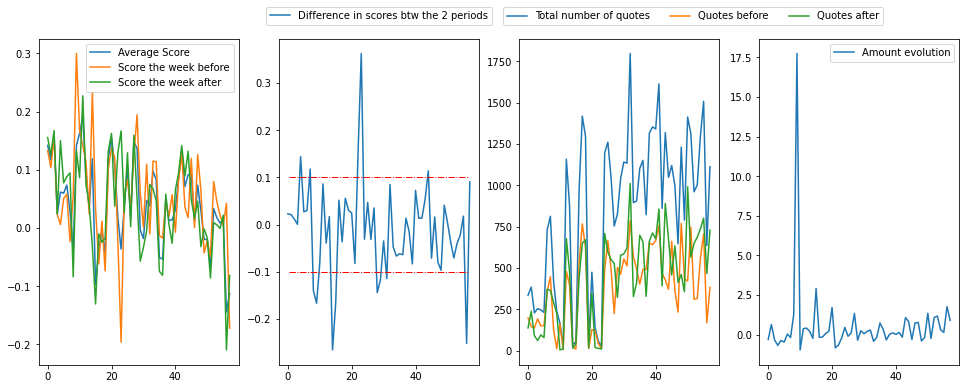

In [387]:
fig, axes = plt.subplots(1, 4, figsize=(16.5,6))
axes[0].plot(sum_all.iloc[:,1], label=('Average Score'))
axes[0].plot(sum_all.iloc[:,2], label=('Score the week before'))
axes[0].plot(sum_all.iloc[:,3], label=('Score the week after'))
axes[0].legend()
axes[1].plot(sum_all.iloc[:,4], label=('Difference in scores btw the 2 periods'))
axes[1].legend(loc='center', bbox_to_anchor=(0.5,1.07))
axes[1].axhline(y=0.1, xmin=0.05, xmax=0.95, color='r', linestyle='-.', linewidth=1)
axes[1].axhline(y=-0.1, xmin=0.05, xmax=0.95, color='r', linestyle='-.', linewidth=1)
axes[2].plot(sum_all.iloc[:,5], label=('Total number of quotes'))
axes[2].plot(sum_all.iloc[:,6], label=('Quotes before'))
axes[2].plot(sum_all.iloc[:,7], label=('Quotes after'))
axes[2].legend(loc='lower right', bbox_to_anchor=(0.84,0.9), bbox_transform=fig.transFigure, ncol=3)
axes[3].plot(sum_all.iloc[:,8], label=('Amount evolution'))
axes[3].legend()

#### Removing the unique very large value in 4th graph :

In [388]:
sum_all[sum_all['Quotes_num_evol'] == sum_all['Quotes_num_evol'].max()]

,Event,Compound_avg,Compound_avg_bef,Compound_avg_aft,Diff_comp_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
9,New Hampshire primaries won by D. Trump,0.141425,0.299708,0.132984,-0.166725,237,12,225,17.75


In [389]:
sum_all2 = sum_all.drop(index=9)
sum_dem2 = sum_dem.drop(index=9)
sum_rep2 = sum_rep.drop(index=9)

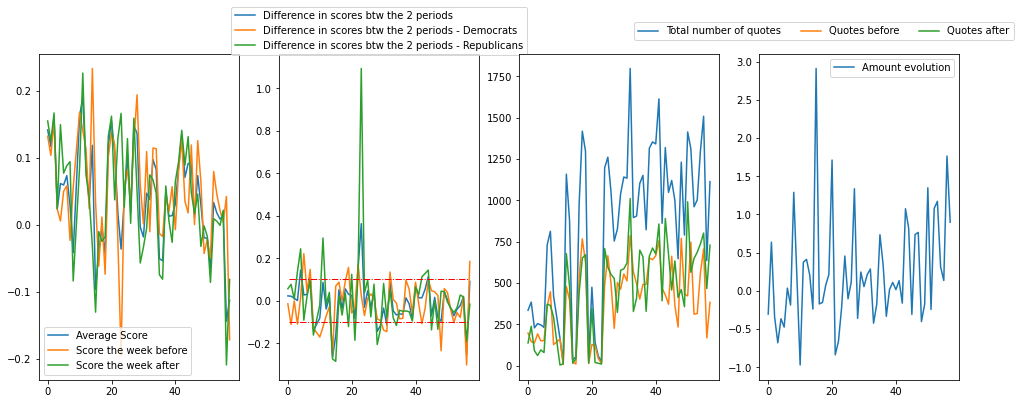

In [390]:
fig, axes = plt.subplots(1, 4, figsize=(16.5,6))
axes[0].plot(sum_all2.iloc[:,1], label=('Average Score'))
axes[0].plot(sum_all2.iloc[:,2], label=('Score the week before'))
axes[0].plot(sum_all2.iloc[:,3], label=('Score the week after'))
axes[0].legend()
axes[1].plot(sum_all2.iloc[:,4], label=('Difference in scores btw the 2 periods'))
axes[1].plot(sum_dem2.iloc[:,4], label=('Difference in scores btw the 2 periods - Democrats'))
axes[1].plot(sum_rep2.iloc[:,4], label=('Difference in scores btw the 2 periods - Republicans'))
axes[1].legend(loc='center', bbox_to_anchor=(0.5,1.07))
axes[1].axhline(y=0.1, xmin=0.05, xmax=0.95, color='r', linestyle='-.', linewidth=1)
axes[1].axhline(y=-0.1, xmin=0.05, xmax=0.95, color='r', linestyle='-.', linewidth=1)
axes[2].plot(sum_all2.iloc[:,5], label=('Total number of quotes'))
axes[2].plot(sum_all2.iloc[:,6], label=('Quotes before'))
axes[2].plot(sum_all2.iloc[:,7], label=('Quotes after'))
axes[2].legend(loc='lower right', bbox_to_anchor=(0.95,0.9), bbox_transform=fig.transFigure, ncol=3)
axes[3].plot(sum_all2.iloc[:,8], label=('Amount evolution'))
axes[3].legend()

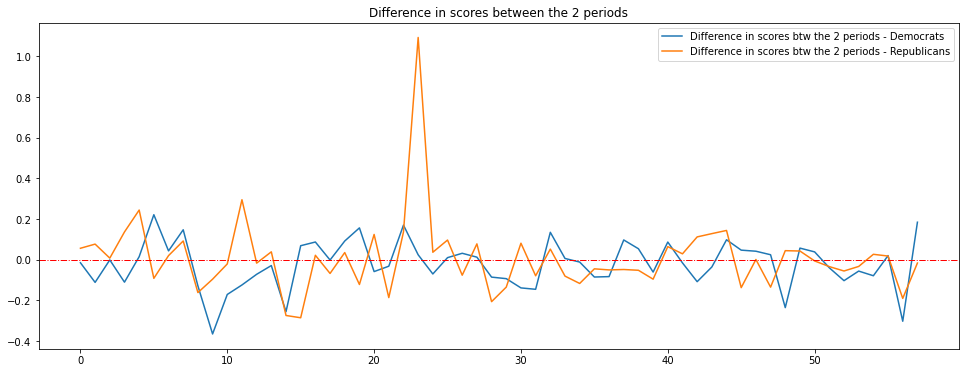

In [391]:
# Difference in scores zoomed in
fig, axes = plt.subplots(figsize=(16.5,6))
axes.plot(sum_dem.iloc[:,4], label=('Difference in scores btw the 2 periods - Democrats'))
axes.plot(sum_rep.iloc[:,4], label=('Difference in scores btw the 2 periods - Republicans'))
axes.axhline(y=0, color='r', linestyle='-.', linewidth=1)
axes.legend()
axes.set_title('Difference in scores between the 2 periods');

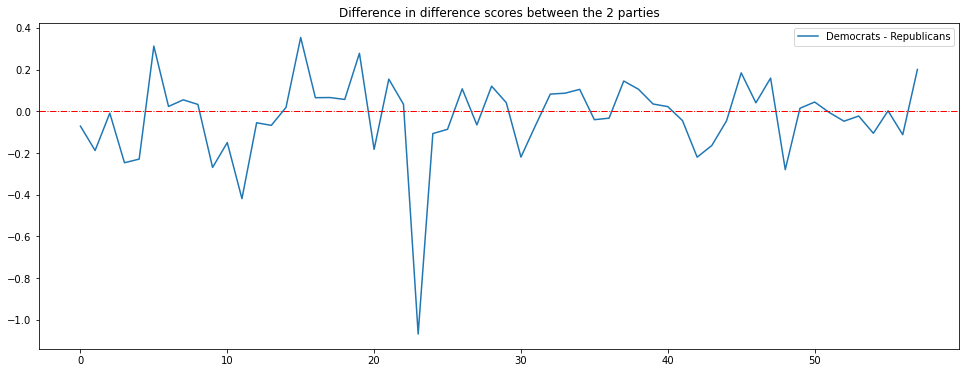

In [392]:
# Difference between each party for the difference in score
fig, axes = plt.subplots(figsize=(16.5,6))
axes.plot(sum_dem.iloc[:,4] - sum_rep.iloc[:,4], label = 'Democrats - Republicans')
axes.axhline(y=0, color='r', linestyle='-.', linewidth=1)
axes.legend()
axes.set_title('Difference in difference scores between the 2 parties');

# Most extreme values inspection
## Difference in score (average after - average before)
### Overall

In [424]:
sum_all[(sum_all.iloc[:,4] >= sum_all.iloc[:,4].quantile(0.9)) | (sum_all.iloc[:,4] <= sum_all.iloc[:,4].quantile(0.1))].iloc[:,[0,4,6,7,8]]

,Event,Diff_comp_avg,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
4,H. Clinton email's controversy,0.144023,151,96,-0.364238
7,Paul Ryan (rep.) elected Speaker of the House ...,0.117798,448,365,-0.185268
8,San Bernardino shooting,-0.13973,128,293,1.289062
9,New Hampshire primaries won by D. Trump,-0.166725,12,225,17.75
14,Orlando shooting,-0.265601,21,16,-0.238095
15,Democrat Representatives protest in House of R...,-0.164455,11,43,2.909091
22,Allegations of russian interference in preside...,0.154115,44,15,-0.659091
23,D. Trump sworn as President,0.362523,14,11,-0.214286
28,Las Vegas mass shooting,-0.144179,504,323,-0.359127
44,2020 presidential campaign starts,0.113974,372,676,0.817204


### Democrats

In [427]:
sum_dem[(sum_dem.iloc[:,4] >= sum_dem.iloc[:,4].quantile(0.9)) | (sum_dem.iloc[:,4] <= sum_dem.iloc[:,4].quantile(0.1))].iloc[:,[0,4,6,7,8]]

,Event,Diff_comp_avg,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
5,Same-sex marriage supreme court rule,0.221311,89,30,-0.662921
7,Paul Ryan (rep.) elected Speaker of the House ...,0.14728,228,134,-0.412281
9,New Hampshire primaries won by D. Trump,-0.364948,5,140,27.0
10,Super Tuesday,-0.170734,98,2,-0.979592
14,Orlando shooting,-0.255346,14,4,-0.714286
19,2016 Presidential Election,0.156594,8,11,0.375
22,Allegations of russian interference in preside...,0.170239,28,8,-0.714286
31,Shitholegate,-0.145314,199,282,0.417085
32,Government shutdown,0.134917,312,402,0.288462
48,El Paso shooting,-0.235365,428,211,-0.507009


### Republicans

In [429]:
sum_rep[(sum_rep.iloc[:,4] >= sum_rep.iloc[:,4].quantile(0.9)) | (sum_rep.iloc[:,4] <= sum_rep.iloc[:,4].quantile(0.1))].iloc[:,[0,4,6,7,8]]

,Event,Diff_comp_avg,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
3,Baltimore protests,0.136596,104,26,-0.75
4,H. Clinton email's controversy,0.244324,96,49,-0.489583
8,San Bernardino shooting,-0.161446,44,99,1.25
11,Merrick Garland Supreme Court nomination,0.295073,5,3,-0.4
14,Orlando shooting,-0.274046,7,12,0.714286
15,Democrat Representatives protest in House of R...,-0.28526,8,18,1.25
21,US troosp withdraw from Afghanistan,-0.186107,59,6,-0.898305
22,Allegations of russian interference in preside...,0.136489,16,7,-0.5625
23,D. Trump sworn as President,1.092767,5,3,-0.4
28,Las Vegas mass shooting,-0.206088,268,127,-0.526119


## Number of quotes
### Overall

In [430]:
sum_all[(sum_all.iloc[:,8] >= sum_all.iloc[:,8].quantile(0.9)) | (sum_all.iloc[:,8] <= sum_all.iloc[:,8].quantile(0.1))].iloc[:,[0,4,6,7,8]]

,Event,Diff_comp_avg,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
3,Baltimore protests,0.000618,193,62,-0.678756
5,Same-sex marriage supreme court rule,0.027039,152,80,-0.473684
9,New Hampshire primaries won by D. Trump,-0.166725,12,225,17.75
10,Super Tuesday,-0.081974,162,5,-0.969136
15,Democrat Representatives protest in House of R...,-0.164455,11,43,2.909091
20,D. Trump visits Taiwan,0.024653,128,347,1.710938
21,US troosp withdraw from Afghanistan,-0.082436,122,20,-0.836066
22,Allegations of russian interference in preside...,0.154115,44,15,-0.659091
27,New immigration policy bill by Trump administr...,0.035392,226,528,1.336283
33,Marjory Stoneman Douglas High School shooting,-0.047664,568,328,-0.422535


### Democrats

In [431]:
sum_dem[(sum_dem.iloc[:,8] >= sum_dem.iloc[:,8].quantile(0.9)) | (sum_dem.iloc[:,8] <= sum_dem.iloc[:,8].quantile(0.1))].iloc[:,[0,4,6,7,8]]

,Event,Diff_comp_avg,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
1,US-Cuba relations start again,-0.111245,37,117,2.162162
3,Baltimore protests,-0.110206,89,36,-0.595506
5,Same-sex marriage supreme court rule,0.221311,89,30,-0.662921
9,New Hampshire primaries won by D. Trump,-0.364948,5,140,27.0
10,Super Tuesday,-0.170734,98,2,-0.979592
11,Merrick Garland Supreme Court nomination,-0.124,3,8,1.666667
14,Orlando shooting,-0.255346,14,4,-0.714286
15,Democrat Representatives protest in House of R...,0.068979,3,25,7.333333
20,D. Trump visits Taiwan,-0.05819,68,204,2.0
21,US troosp withdraw from Afghanistan,-0.031797,63,14,-0.777778


### Republicans

In [409]:
sum_rep[(sum_rep.iloc[:,8] >= sum_rep.iloc[:,8].quantile(0.9)) | (sum_rep.iloc[:,8] <= sum_rep.iloc[:,8].quantile(0.1))].index

Int64Index([3, 4, 8, 9, 10, 15, 20, 21, 22, 28, 50, 56], dtype='int64')

In [432]:
sum_rep[(sum_rep.iloc[:,8] >= sum_rep.iloc[:,8].quantile(0.9)) | (sum_rep.iloc[:,8] <= sum_rep.iloc[:,8].quantile(0.1))].iloc[:,[0,4,6,7,8]]

,Event,Diff_comp_avg,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
3,Baltimore protests,0.136596,104,26,-0.75
4,H. Clinton email's controversy,0.244324,96,49,-0.489583
8,San Bernardino shooting,-0.161446,44,99,1.25
9,New Hampshire primaries won by D. Trump,-0.095625,7,85,11.142857
10,Super Tuesday,-0.020606,64,3,-0.953125
15,Democrat Representatives protest in House of R...,-0.28526,8,18,1.25
20,D. Trump visits Taiwan,0.124374,60,143,1.383333
21,US troosp withdraw from Afghanistan,-0.186107,59,6,-0.898305
22,Allegations of russian interference in preside...,0.136489,16,7,-0.5625
28,Las Vegas mass shooting,-0.206088,268,127,-0.526119


In [399]:
print('Overall : \n',sum_all[(sum_all.iloc[:,8] >= sum_all.iloc[:,8].quantile(0.9)) | (sum_all.iloc[:,8] <= sum_all.iloc[:,8].quantile(0.1))]['Event'],
     '\n \n Democrats : \n', sum_dem[(sum_dem.iloc[:,8] >= sum_dem.iloc[:,8].quantile(0.9)) | (sum_dem.iloc[:,8] <= sum_dem.iloc[:,8].quantile(0.1))]['Event'],
     '\n \n Republicans : \n', sum_rep[(sum_rep.iloc[:,8] >= sum_rep.iloc[:,8].quantile(0.9)) | (sum_rep.iloc[:,8] <= sum_rep.iloc[:,8].quantile(0.1))]['Event'])


Overall : 
 3                                    Baltimore protests
5                  Same-sex marriage supreme court rule
9               New Hampshire primaries won by D. Trump
10                                        Super Tuesday
15    Democrat Representatives protest in House of R...
20                               D. Trump visits Taiwan
21                  US troosp withdraw from Afghanistan
22    Allegations of russian interference in preside...
27    New immigration policy bill by Trump administr...
33        Marjory Stoneman Douglas High School shooting
50    Start of impeachment inquiry against Pres. D. ...
56            Murder of Iranian general Qasem Soleimani
Name: Event, dtype: object 
 
 Democrats : 
 1                         US-Cuba relations start again
3                                    Baltimore protests
5                  Same-sex marriage supreme court rule
9               New Hampshire primaries won by D. Trump
10                                        Super

## Most controversial events (Increase in number of quotes the week after)
### Overall

In [433]:
sum_all[(sum_all.iloc[:,8] >= sum_all.iloc[:,8].quantile(0.9))].iloc[:,[0,4,6,7,8]]

,Event,Diff_comp_avg,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
9,New Hampshire primaries won by D. Trump,-0.166725,12,225,17.75
15,Democrat Representatives protest in House of R...,-0.164455,11,43,2.909091
20,D. Trump visits Taiwan,0.024653,128,347,1.710938
27,New immigration policy bill by Trump administr...,0.035392,226,528,1.336283
50,Start of impeachment inquiry against Pres. D. ...,0.004898,422,991,1.348341
56,Murder of Iranian general Qasem Soleimani,-0.251909,169,467,1.763314


### Democrats

In [434]:
sum_dem[(sum_dem.iloc[:,8] >= sum_dem.iloc[:,8].quantile(0.9))].iloc[:,[0,4,6,7,8]]

,Event,Diff_comp_avg,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
1,US-Cuba relations start again,-0.111245,37,117,2.162162
9,New Hampshire primaries won by D. Trump,-0.364948,5,140,27.0
11,Merrick Garland Supreme Court nomination,-0.124,3,8,1.666667
15,Democrat Representatives protest in House of R...,0.068979,3,25,7.333333
20,D. Trump visits Taiwan,-0.05819,68,204,2.0
44,2020 presidential campaign starts,0.098203,110,337,2.063636


### Republicans

In [435]:
sum_rep[(sum_rep.iloc[:,8] >= sum_rep.iloc[:,8].quantile(0.9))].iloc[:,[0,4,6,7,8]]

,Event,Diff_comp_avg,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
8,San Bernardino shooting,-0.161446,44,99,1.25
9,New Hampshire primaries won by D. Trump,-0.095625,7,85,11.142857
15,Democrat Representatives protest in House of R...,-0.28526,8,18,1.25
20,D. Trump visits Taiwan,0.124374,60,143,1.383333
50,Start of impeachment inquiry against Pres. D. ...,-0.00589,216,636,1.944444
56,Murder of Iranian general Qasem Soleimani,-0.19001,73,220,2.013699


## Silencing events (less quotes the week after)
### Overall

In [436]:
sum_all[(sum_all.iloc[:,8] <= sum_all.iloc[:,8].quantile(0.1))].iloc[:,[0,4,6,7,8]]

,Event,Diff_comp_avg,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
3,Baltimore protests,0.000618,193,62,-0.678756
5,Same-sex marriage supreme court rule,0.027039,152,80,-0.473684
10,Super Tuesday,-0.081974,162,5,-0.969136
21,US troosp withdraw from Afghanistan,-0.082436,122,20,-0.836066
22,Allegations of russian interference in preside...,0.154115,44,15,-0.659091
33,Marjory Stoneman Douglas High School shooting,-0.047664,568,328,-0.422535


### Democrats

In [437]:
sum_dem[(sum_dem.iloc[:,8] <= sum_dem.iloc[:,8].quantile(0.1))].iloc[:,[0,4,6,7,8]]

,Event,Diff_comp_avg,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
3,Baltimore protests,-0.110206,89,36,-0.595506
5,Same-sex marriage supreme court rule,0.221311,89,30,-0.662921
10,Super Tuesday,-0.170734,98,2,-0.979592
14,Orlando shooting,-0.255346,14,4,-0.714286
21,US troosp withdraw from Afghanistan,-0.031797,63,14,-0.777778
22,Allegations of russian interference in preside...,0.170239,28,8,-0.714286


### Republicans 

In [438]:
sum_rep[(sum_rep.iloc[:,8] <= sum_rep.iloc[:,8].quantile(0.1))].iloc[:,[0,4,6,7,8]]

,Event,Diff_comp_avg,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
3,Baltimore protests,0.136596,104,26,-0.75
4,H. Clinton email's controversy,0.244324,96,49,-0.489583
10,Super Tuesday,-0.020606,64,3,-0.953125
21,US troosp withdraw from Afghanistan,-0.186107,59,6,-0.898305
22,Allegations of russian interference in preside...,0.136489,16,7,-0.5625
28,Las Vegas mass shooting,-0.206088,268,127,-0.526119


some thoughts :
- Could tell many things, should we be brief in this part ?
- 6 of the 12 most controversial events come from D. Trump
- Silencing events feels like 3 categories : deuil (shootings) ; apolitical events (Super tuesday) ; prise de position (same sex mariage)
- wtf is Hillary Clinton email controversy doing in the silencing events for republicans (event 13 (2wks) too, H Clinton issue but less quotes overall)
- politically correctness kicking in to prevent politics to speak much about some event (shootings, charlotte protests (2wks))
- san bernadino shooting : more quotes but terrorism so easy to hop on it

In [440]:
((sum_dem[sum_dem['Event'].str.contains(str('Trump'))].iloc[:,4] * sum_dem[sum_dem['Event'].str.contains(str('Trump'))].iloc[:,5]) / sum_dem[sum_dem['Event'].str.contains(str('Trump'))].iloc[:,5].sum()).abs().mean()

0.005164472153868557

In [443]:
((sum_dem[(sum_dem['Event'].str.contains(str('Trump'))) & (sum_dem['Diff_comp_avg'] <= 0)]['Diff_comp_avg'] * sum_dem[(sum_dem['Event'].str.contains(str('Trump'))) & (sum_dem['Diff_comp_avg'] <= 0)]['Quotes_num']) / sum_dem[(sum_dem['Event'].str.contains(str('Trump'))) & (sum_dem['Diff_comp_avg'] <= 0)]['Quotes_num'].sum()).mean()

-0.012018967456407627

In [442]:
sum_dem[sum_dem['Event'].str.contains(str('Trump'))].iloc[:,5]

9     145
12    455
18    562
20    272
23     17
27    425
37    352
50    561
51    446
52    436
53    460
54    596
55    695
Name: Quotes_num, dtype: object

In [441]:
sum_dem.iloc[:,4].abs().mean()


0.08950579322335528